In [1]:
import pandas as pd

df_adm = pd.read_csv("admissions_filtered.csv", encoding="ISO-8859-1")


In [260]:
df_adm = df_adm[df_adm['los_days'] > 0.25]

In [262]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17975 entries, 0 to 18179
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patientid           17975 non-null  int64  
 1   admissionid         17975 non-null  int64  
 2   location            17975 non-null  object 
 3   admissionyeargroup  17975 non-null  object 
 4   agegroup            17975 non-null  object 
 5   weightgroup         17508 non-null  object 
 6   heightgroup         17118 non-null  object 
 7   specialty           17027 non-null  object 
 8   los_days            17975 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.4+ MB


See below. There are a lot of different specialties, some very popular, others not. Should we include everything or only top N (and then make it binary)

In [21]:
df_adm['specialty'].value_counts()

specialty
Cardiochirurgie                 6922
Neurochirurgie                  1905
Vaatchirurgie                   1036
Traumatologie                    965
Inwendig                         926
Heelkunde Gastro-enterologie     829
Cardiologie                      744
Intensive Care Volwassenen       727
Neurologie                       536
Heelkunde Oncologie              377
Longziekte                       294
Keel, Neus & Oorarts             290
Heelkunde Longen/Oncologie       289
Nefrologie                       276
Orthopedie                       161
Gynaecologie                     159
Urologie                         152
Hematologie                      140
Maag-,Darm-,Leverziekten         127
Oncologie Inwendig                54
ders                              45
Plastische chirurgie              22
Mondheelkunde                     17
Verloskunde                       14
Obstetrie                         13
Oogheelkunde                       4
Reumatologie                

In [151]:
df_num = pd.read_csv("sixhr1.csv", encoding="ISO-8859-1")


In [153]:
df_num

,admissionid,itemid,item,tag,value,unit,measuredat
0,0,6640,Hartfrequentie,,83.0,/min,20520000
1,0,6641,ABP systolisch,,102.0,mmHg,20520000
2,0,6642,ABP gemiddeld,,68.0,mmHg,20520000
3,0,6643,ABP diastolisch,,49.0,mmHg,20520000
4,0,6644,PAP systolisch,,31.0,mmHg,20520000
...,...,...,...,...,...,...,...
53307791,23552,13062,Temp Oor,,36.0,ÃÂÃÂ°C,10380000
53307792,23552,14442,eGFR(MDRD) (bloed),>,90.0,ml/min/1.73m2,-181680000
53307793,23552,17982,APTT (bloed),NUL,33.0,sec,-186720000
53307794,23552,19227,DOS score,,1.0,Geen,17580000


In [155]:
items_to_keep = [
    "Hartfrequentie",
    "Saturatie (Monitor)",
    "UrineCAD",
    "ABP systolisch",
    "ABP diastolisch",
    "ABP gemiddeld",
    "Glucose (bloed)",
    "pCO2 (bloed)",
    "pH (bloed)",
    "Act.HCO3 (bloed)",
    "B.E. (bloed)",
    "PO2 (bloed)",
    "O2-Saturatie (bloed)",
    "Thrombo's (bloed)",
    "Kreatinine (bloed)"
]

df_num2 = df_num[df_num['item'].isin(items_to_keep)]
df_num2


,admissionid,itemid,item,tag,value,unit,measuredat
0,0,6640,Hartfrequentie,,83.0,/min,20520000
1,0,6641,ABP systolisch,,102.0,mmHg,20520000
2,0,6642,ABP gemiddeld,,68.0,mmHg,20520000
3,0,6643,ABP diastolisch,,49.0,mmHg,20520000
12,0,6709,Saturatie (Monitor),,96.0,NaN,20520000
...,...,...,...,...,...,...,...
53307435,23552,6709,Saturatie (Monitor),NUL,96.0,NaN,21540000
53307436,23552,6709,Saturatie (Monitor),NUL,96.0,NaN,21600000
53307437,23552,8794,UrineCAD,,150.0,ml,4860000
53307786,23552,9941,Kreatinine (bloed),NUL,62.0,ÃÂÃÂµmol/l,-181680000


In [157]:
admissions = df['admissionid'].unique()

df_num3 = df_num2[df_num2['admissionid'].isin(valid_ids)]
df_num3


,admissionid,itemid,item,tag,value,unit,measuredat
0,0,6640,Hartfrequentie,,83.0,/min,20520000
1,0,6641,ABP systolisch,,102.0,mmHg,20520000
2,0,6642,ABP gemiddeld,,68.0,mmHg,20520000
3,0,6643,ABP diastolisch,,49.0,mmHg,20520000
12,0,6709,Saturatie (Monitor),,96.0,NaN,20520000
...,...,...,...,...,...,...,...
53307435,23552,6709,Saturatie (Monitor),NUL,96.0,NaN,21540000
53307436,23552,6709,Saturatie (Monitor),NUL,96.0,NaN,21600000
53307437,23552,8794,UrineCAD,,150.0,ml,4860000
53307786,23552,9941,Kreatinine (bloed),NUL,62.0,ÃÂÃÂµmol/l,-181680000


In [227]:
unit_counts = df_num3.loc[
    df_num3['item'] == 'B.E. (bloed)',
    'unit'
].value_counts()
unit_counts

unit
mmol/l    83134
Name: count, dtype: int64

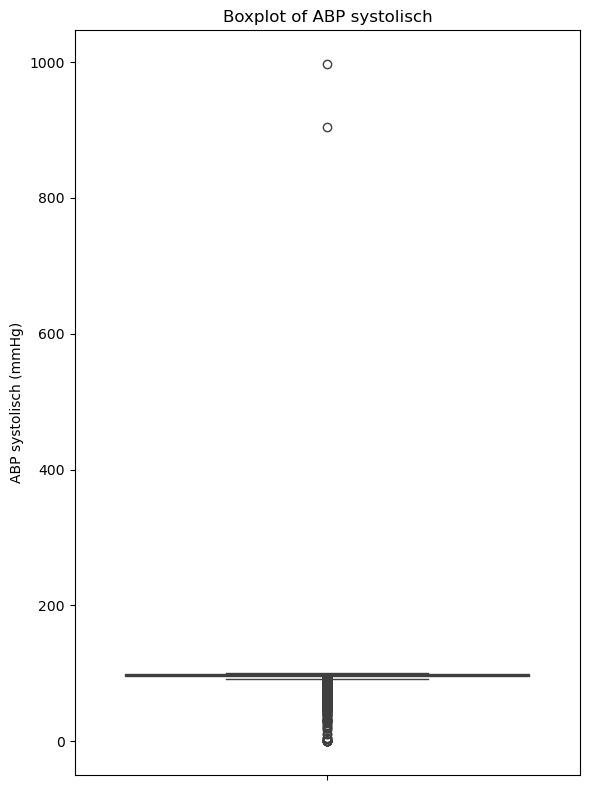

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

df_abp_sys = df_num3[df_num3['item'] == "Saturatie (Monitor)"]

plt.figure(figsize=(6, 8))
sns.boxplot(y='value', data=df_abp_sys)
plt.title('Boxplot of ABP systolisch')
plt.ylabel('ABP systolisch (mmHg)')
plt.tight_layout()
plt.show()


In [167]:
df_stats = (
    df_num3
    .groupby('item')['value']
    .agg(min_value='min', max_value='max', mean_value='mean')
    .reset_index()
)

print(df_stats)

                    item  min_value    max_value  mean_value
0        ABP diastolisch       -1.0   690.000000   61.379698
1          ABP gemiddeld   -32698.0  2590.000000   79.810784
2         ABP systolisch       -1.0  1132.000000  118.391934
3       Act.HCO3 (bloed)      -23.9   325.299990   22.772144
4           B.E. (bloed)      -70.0   139.000000    2.019534
5        Glucose (bloed)        0.0    94.000000    8.537334
6         Hartfrequentie        0.0   300.000000   81.862306
7     Kreatinine (bloed)        4.0  2326.000000  115.471711
8   O2-Saturatie (bloed)        0.0    99.800003    0.964455
9            PO2 (bloed)        0.0   862.000000  151.344224
10   Saturatie (Monitor)        0.0   997.000000   97.093113
11     Thrombo's (bloed)        0.0  1650.000000  205.697481
12              UrineCAD        0.0  4000.000000  168.498931
13          pCO2 (bloed)        0.0   483.000000   41.152034
14            pH (bloed)        0.0  7366.000000    7.884945


In [169]:
extremes = {}

for item, grp in df_num3.groupby('item'):
    # get the 100 lowest and 100 highest rows by 'value'
    lowest100  = grp.nsmallest(100, 'value')
    highest100 = grp.nlargest(100, 'value')
    
    # store them
    extremes[item] = {
        'lowest_100':  lowest100,
        'highest_100': highest100
    }


In [171]:
extremes

{'ABP diastolisch': {'lowest_100':          admissionid  itemid             item  tag  value  unit  measuredat
  68365             20    6643  ABP diastolisch        -1.0  mmHg     3120000
  196394            98    6643  ABP diastolisch        -1.0  mmHg      480000
  1046950          476    6643  ABP diastolisch        -1.0  mmHg     1440000
  1950291          884    6643  ABP diastolisch        -1.0  mmHg     4500000
  1950292          884    6643  ABP diastolisch        -1.0  mmHg     8040000
  ...              ...     ...              ...  ...    ...   ...         ...
  1444042          648    6643  ABP diastolisch  NUL    0.0  mmHg     8400000
  2181007         1017    6643  ABP diastolisch  NUL    0.0  mmHg     4380000
  2873475         1309    6643  ABP diastolisch         0.0  mmHg    18780000
  3606137         1653    6643  ABP diastolisch  NUL    0.0  mmHg      420000
  4044010         1848    6643  ABP diastolisch  NUL    0.0  mmHg    20340000
  
  [100 rows x 7 columns],
  

In [231]:

df = df_num3.copy()

ranges = {
    "ABP diastolisch":     (  0,   375),
    "ABP systolisch":      (  0,   375),
    "ABP gemiddeld":       ( 14,   330),  
    "Act.HCO3 (bloed)":    (  0,    60),
    "Hartfrequentie":      (  0,   350),
    "Glucose (bloed)":     (1.83,111.00),  # already in mmol/L
    "Kreatinine (bloed)":  (8.84,5305.20),  # in µmol/L
    "O2-Saturatie (bloed)":(  0,   100),
    "PO2 (bloed)":         ( 32,   700),
    "pCO2 (bloed)":        (  0,   200),
    "pH (bloed)":          (6.30,   8.40),
    "UrineCAD":            (  0,  1200),
    "Thrombo's (bloed)":   (  0,  2000),
    "B.E. (bloed)":        (-45,    45),
    "Saturatie (Monitor)": (  0,   100)
}

deletions = {}
for item, (low, high) in ranges.items():
    mask_item = df['item'] == item
    mask_invalid = mask_item & ~df['value'].between(low, high)
    deletions[item] = int(mask_invalid.sum())

valid = pd.Series(False, index=df.index)
for item, (low, high) in ranges.items():
    mask_item = df['item'] == item
    valid |= (mask_item & df['value'].between(low, high))

df_clean = df[valid].reset_index(drop=True)

print("Rows removed per item:")
for item, cnt in deletions.items():
    print(f"  {item:20s}: {cnt:5d}")


Rows removed per item:
  ABP diastolisch     :    95
  ABP systolisch      :    95
  ABP gemiddeld       :   360
  Act.HCO3 (bloed)    :    20
  Hartfrequentie      :     0
  Glucose (bloed)     :    78
  Kreatinine (bloed)  :     9
  O2-Saturatie (bloed):     0
  PO2 (bloed)         :   928
  pCO2 (bloed)        :     4
  pH (bloed)          :    35
  UrineCAD            :   118
  Thrombo's (bloed)   :     0
  B.E. (bloed)        :     4
  Saturatie (Monitor) :     2


In [463]:
df_clean

,admissionid,itemid,item,tag,value,unit,measuredat
0,0,6640,Hartfrequentie,,83.0,/min,20520000
1,0,6641,ABP systolisch,,102.0,mmHg,20520000
2,0,6642,ABP gemiddeld,,68.0,mmHg,20520000
3,0,6643,ABP diastolisch,,49.0,mmHg,20520000
4,0,6709,Saturatie (Monitor),,96.0,NaN,20520000
...,...,...,...,...,...,...,...
8417328,23552,6709,Saturatie (Monitor),NUL,96.0,NaN,21540000
8417329,23552,6709,Saturatie (Monitor),NUL,96.0,NaN,21600000
8417330,23552,8794,UrineCAD,,150.0,ml,4860000
8417331,23552,9941,Kreatinine (bloed),NUL,62.0,ÃÂÃÂµmol/l,-181680000


In [475]:
df_clean = df_clean[df_clean['measuredat'] >= 0]

In [477]:
stats = (
    df_clean
      .groupby(['admissionid', 'item'])['value']
      .agg(mean='mean', sd = lambda x: x.std(ddof=0))
      .reset_index()
)

df_summary = stats.pivot(
    index='admissionid',
    columns='item',
    values=['mean', 'sd']
)

df_summary.columns = [
    f"{item}_{stat}" for stat, item in df_summary.columns
]

df_summary = df_summary.reset_index()

df_summary

,admissionid,ABP diastolisch_mean,ABP gemiddeld_mean,ABP systolisch_mean,Act.HCO3 (bloed)_mean,B.E. (bloed)_mean,Glucose (bloed)_mean,Hartfrequentie_mean,Kreatinine (bloed)_mean,O2-Saturatie (bloed)_mean,...,Glucose (bloed)_sd,Hartfrequentie_sd,Kreatinine (bloed)_sd,O2-Saturatie (bloed)_sd,PO2 (bloed)_sd,Saturatie (Monitor)_sd,Thrombo's (bloed)_sd,UrineCAD_sd,pCO2 (bloed)_sd,pH (bloed)_sd
0,0,49.000000,68.000000,102.000000,23.600000,-1.100000,11.400000,83.000000,NaN,0.9900,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,59.500000,74.833333,114.333333,25.600000,0.900000,8.933333,76.666667,91.0,0.9900,...,0.213437,6.182412,0.0,0.000000,17.307673,1.374369,1.000000,82.259751,6.944222,0.049889
2,2,66.285714,82.714286,122.714286,22.633333,2.166667,9.500000,67.285714,81.0,0.9700,...,1.708801,4.526566,0.0,0.000000,10.964589,1.678191,18.000000,41.070738,3.559026,0.043205
3,3,79.200000,96.400000,130.800000,22.649999,-1.950000,9.866667,83.200000,113.0,0.9750,...,0.903081,0.979796,0.0,0.005000,18.000000,0.800000,22.171052,172.995260,1.000000,0.000000
4,4,51.219780,66.474265,111.043956,21.925001,-3.075000,10.950000,73.755474,98.0,0.8800,...,1.171537,3.293777,0.0,0.139104,24.601829,1.139230,39.098167,33.555923,3.699662,0.026926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17881,23545,63.000000,82.666667,124.000000,21.650001,3.150000,7.950000,94.333333,69.0,0.9900,...,0.150000,6.944222,0.0,0.000000,0.000000,0.471405,0.000000,0.000000,0.000000,0.010000
17882,23546,73.310897,92.403175,132.128205,19.750000,4.075000,8.437500,76.826923,68.0,0.9625,...,1.250937,23.154349,0.0,0.031125,23.047505,2.492310,15.738091,NaN,2.692582,0.041533
17883,23548,84.666667,102.666667,124.500000,21.649999,2.950000,7.700000,66.000000,55.0,0.9900,...,0.648074,7.257180,0.0,0.000000,24.000000,0.800000,0.000000,375.000000,2.500000,0.030000
17884,23549,NaN,NaN,NaN,20.299999,3.800000,10.766667,73.525140,380.0,0.6700,...,0.873053,9.586022,0.0,0.000000,0.000000,0.988966,0.000000,71.903678,0.000000,0.000000


In [241]:
df_summary.describe()

,admissionid,ABP diastolisch_mean,ABP gemiddeld_mean,ABP systolisch_mean,Act.HCO3 (bloed)_mean,B.E. (bloed)_mean,Glucose (bloed)_mean,Hartfrequentie_mean,Kreatinine (bloed)_mean,O2-Saturatie (bloed)_mean,...,Glucose (bloed)_sd,Hartfrequentie_sd,Kreatinine (bloed)_sd,O2-Saturatie (bloed)_sd,PO2 (bloed)_sd,Saturatie (Monitor)_sd,Thrombo's (bloed)_sd,UrineCAD_sd,pCO2 (bloed)_sd,pH (bloed)_sd
count,17929.000000,16425.000000,16423.000000,16426.000000,16477.000000,16475.000000,17008.000000,17702.000000,16917.000000,16427.000000,...,16006.000000,17530.000000,13889.000000,14916.000000,14915.000000,17465.000000,14240.000000,15812.000000,15028.000000,15034.000000
mean,11743.628479,60.470648,80.206632,119.996879,22.846779,1.709076,8.202404,80.882043,107.675818,0.971074,...,1.748686,6.938406,12.012332,0.050549,60.032597,1.506142,50.340579,95.597992,4.856047,0.045674
std,6797.511417,11.082486,13.227605,20.277568,3.255087,3.646154,2.551443,16.581128,111.527428,1.138888,...,1.374093,4.812741,26.531440,0.542764,45.983824,1.834689,34.789580,83.644704,3.831437,0.033162
min,0.000000,0.000000,32.500000,0.000000,0.600000,-22.150000,3.000000,33.500000,9.000000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5835.000000,53.134199,70.896866,105.750000,21.500000,0.500000,6.883333,69.333333,69.000000,0.950000,...,0.919239,3.717451,3.055050,0.005773,21.794112,0.707107,26.870058,35.355339,2.695896,0.025884
50%,11738.000000,59.000000,78.151862,117.000000,23.100000,1.566667,7.842262,78.893436,84.500000,0.975333,...,1.544447,5.811865,6.363961,0.015000,47.232959,1.199933,45.254834,71.564364,4.077036,0.038822
75%,17603.000000,66.166667,87.166667,131.000000,24.450000,2.976786,8.900000,90.166667,104.600000,0.986667,...,2.173323,8.794068,11.313708,0.068198,93.986400,1.861899,65.760931,132.395511,5.859465,0.056391
max,23552.000000,275.444444,279.000000,274.000000,55.200001,31.545455,60.799999,192.379518,2326.000000,99.149997,...,30.004521,52.043863,663.973268,49.065883,345.775216,50.000000,501.343694,791.959595,74.677083,0.376508


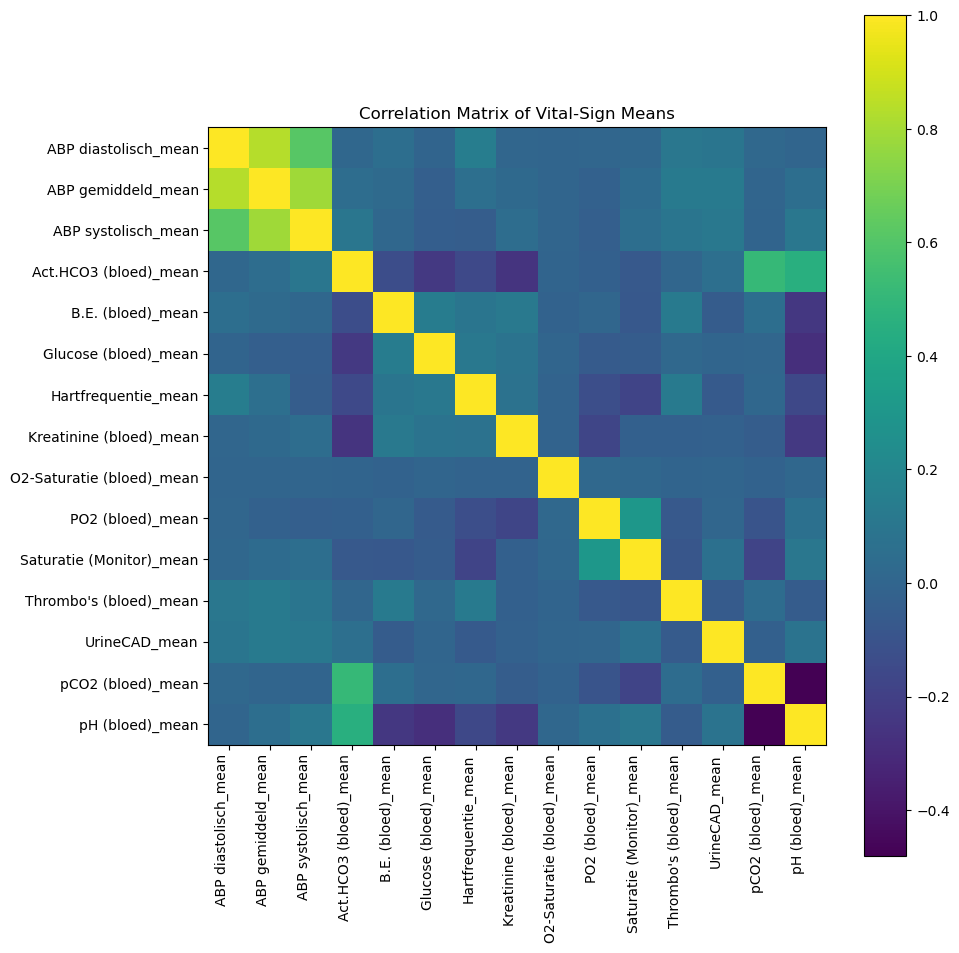

In [243]:
import matplotlib.pyplot as plt

mean_cols = [c for c in df_summary.columns if c.endswith('_mean')]

corr = df_summary[mean_cols].corr()

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(corr)          
ax.set_xticks(range(len(mean_cols)))
ax.set_yticks(range(len(mean_cols)))
ax.set_xticklabels(mean_cols, rotation=90, ha='right')
ax.set_yticklabels(mean_cols)
fig.colorbar(cax, ax=ax)
plt.title('Correlation Matrix of Vital‐Sign Means')
plt.tight_layout()
plt.show()


In [479]:
df_summary.isna().sum()

admissionid                     0
ABP diastolisch_mean         1474
ABP gemiddeld_mean           1476
ABP systolisch_mean          1473
Act.HCO3 (bloed)_mean        2768
B.E. (bloed)_mean            2775
Glucose (bloed)_mean         2209
Hartfrequentie_mean           186
Kreatinine (bloed)_mean      3394
O2-Saturatie (bloed)_mean    2834
PO2 (bloed)_mean             2830
Saturatie (Monitor)_mean      225
Thrombo's (bloed)_mean       3064
UrineCAD_mean                1397
pCO2 (bloed)_mean            2761
pH (bloed)_mean              2767
ABP diastolisch_sd           1474
ABP gemiddeld_sd             1476
ABP systolisch_sd            1473
Act.HCO3 (bloed)_sd          2768
B.E. (bloed)_sd              2775
Glucose (bloed)_sd           2209
Hartfrequentie_sd             186
Kreatinine (bloed)_sd        3394
O2-Saturatie (bloed)_sd      2834
PO2 (bloed)_sd               2830
Saturatie (Monitor)_sd        225
Thrombo's (bloed)_sd         3064
UrineCAD_sd                  1397
pCO2 (bloed)_s

In [483]:
df_summary = df_summary.fillna(-1)

In [485]:
df_summary.isna().sum()

admissionid                  0
ABP diastolisch_mean         0
ABP gemiddeld_mean           0
ABP systolisch_mean          0
Act.HCO3 (bloed)_mean        0
B.E. (bloed)_mean            0
Glucose (bloed)_mean         0
Hartfrequentie_mean          0
Kreatinine (bloed)_mean      0
O2-Saturatie (bloed)_mean    0
PO2 (bloed)_mean             0
Saturatie (Monitor)_mean     0
Thrombo's (bloed)_mean       0
UrineCAD_mean                0
pCO2 (bloed)_mean            0
pH (bloed)_mean              0
ABP diastolisch_sd           0
ABP gemiddeld_sd             0
ABP systolisch_sd            0
Act.HCO3 (bloed)_sd          0
B.E. (bloed)_sd              0
Glucose (bloed)_sd           0
Hartfrequentie_sd            0
Kreatinine (bloed)_sd        0
O2-Saturatie (bloed)_sd      0
PO2 (bloed)_sd               0
Saturatie (Monitor)_sd       0
Thrombo's (bloed)_sd         0
UrineCAD_sd                  0
pCO2 (bloed)_sd              0
pH (bloed)_sd                0
dtype: int64

## Merge vitals with admission table

In [487]:
df_merged = pd.merge(
    df_adm,
    df_summary,
    on='admissionid',
    how='right'   
)

df_merged

,patientid,admissionid,location,admissionyeargroup,agegroup,weightgroup,heightgroup,specialty,los_days,ABP diastolisch_mean,...,Glucose (bloed)_sd,Hartfrequentie_sd,Kreatinine (bloed)_sd,O2-Saturatie (bloed)_sd,PO2 (bloed)_sd,Saturatie (Monitor)_sd,Thrombo's (bloed)_sd,UrineCAD_sd,pCO2 (bloed)_sd,pH (bloed)_sd
0,0,0,IC,2003-2009,80+,60-69,160-169,Cardiochirurgie,1.750000,49.000000,...,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,IC,2010-2016,60-69,70-79,170-179,Cardiochirurgie,1.083333,59.500000,...,0.213437,6.182412,0.0,0.000000,17.307673,1.374369,1.000000,82.259751,6.944222,0.049889
2,2,2,IC,2010-2016,60-69,90-99,180-189,Cardiochirurgie,0.958333,66.285714,...,1.708801,4.526566,0.0,0.000000,10.964589,1.678191,18.000000,41.070738,3.559026,0.043205
3,3,3,IC,2003-2009,50-59,90-99,180-189,Cardiochirurgie,0.958333,79.200000,...,0.903081,0.979796,0.0,0.005000,18.000000,0.800000,22.171052,172.995260,1.000000,0.000000
4,4,4,IC&MC,2010-2016,70-79,70-79,170-179,Cardiochirurgie,2.083333,51.219780,...,1.171537,3.293777,0.0,0.139104,24.601829,1.139230,39.098167,33.555923,3.699662,0.026926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17881,20319,23545,MC,2010-2016,18-39,60-69,160-169,Traumatologie,5.458333,63.000000,...,0.150000,6.944222,0.0,0.000000,0.000000,0.471405,0.000000,0.000000,0.000000,0.010000
17882,20320,23546,IC,2010-2016,60-69,80-89,190+,Cardiologie,4.083333,73.310897,...,1.250937,23.154349,0.0,0.031125,23.047505,2.492310,15.738091,-1.000000,2.692582,0.041533
17883,20322,23548,IC&MC,2010-2016,40-49,70-79,180-189,Neurochirurgie,11.000000,84.666667,...,0.648074,7.257180,0.0,0.000000,24.000000,0.800000,0.000000,375.000000,2.500000,0.030000
17884,20323,23549,MC,2010-2016,40-49,60-69,160-169,Nefrologie,0.666667,-1.000000,...,0.873053,9.586022,0.0,0.000000,0.000000,0.988966,0.000000,71.903678,0.000000,0.000000


In [489]:
df_merged['los'] = (df_merged['los_days'] > 1).astype(int)
df_merged

,patientid,admissionid,location,admissionyeargroup,agegroup,weightgroup,heightgroup,specialty,los_days,ABP diastolisch_mean,...,Hartfrequentie_sd,Kreatinine (bloed)_sd,O2-Saturatie (bloed)_sd,PO2 (bloed)_sd,Saturatie (Monitor)_sd,Thrombo's (bloed)_sd,UrineCAD_sd,pCO2 (bloed)_sd,pH (bloed)_sd,los
0,0,0,IC,2003-2009,80+,60-69,160-169,Cardiochirurgie,1.750000,49.000000,...,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1,1,IC,2010-2016,60-69,70-79,170-179,Cardiochirurgie,1.083333,59.500000,...,6.182412,0.0,0.000000,17.307673,1.374369,1.000000,82.259751,6.944222,0.049889,1
2,2,2,IC,2010-2016,60-69,90-99,180-189,Cardiochirurgie,0.958333,66.285714,...,4.526566,0.0,0.000000,10.964589,1.678191,18.000000,41.070738,3.559026,0.043205,0
3,3,3,IC,2003-2009,50-59,90-99,180-189,Cardiochirurgie,0.958333,79.200000,...,0.979796,0.0,0.005000,18.000000,0.800000,22.171052,172.995260,1.000000,0.000000,0
4,4,4,IC&MC,2010-2016,70-79,70-79,170-179,Cardiochirurgie,2.083333,51.219780,...,3.293777,0.0,0.139104,24.601829,1.139230,39.098167,33.555923,3.699662,0.026926,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17881,20319,23545,MC,2010-2016,18-39,60-69,160-169,Traumatologie,5.458333,63.000000,...,6.944222,0.0,0.000000,0.000000,0.471405,0.000000,0.000000,0.000000,0.010000,1
17882,20320,23546,IC,2010-2016,60-69,80-89,190+,Cardiologie,4.083333,73.310897,...,23.154349,0.0,0.031125,23.047505,2.492310,15.738091,-1.000000,2.692582,0.041533,1
17883,20322,23548,IC&MC,2010-2016,40-49,70-79,180-189,Neurochirurgie,11.000000,84.666667,...,7.257180,0.0,0.000000,24.000000,0.800000,0.000000,375.000000,2.500000,0.030000,1
17884,20323,23549,MC,2010-2016,40-49,60-69,160-169,Nefrologie,0.666667,-1.000000,...,9.586022,0.0,0.000000,0.000000,0.988966,0.000000,71.903678,0.000000,0.000000,0


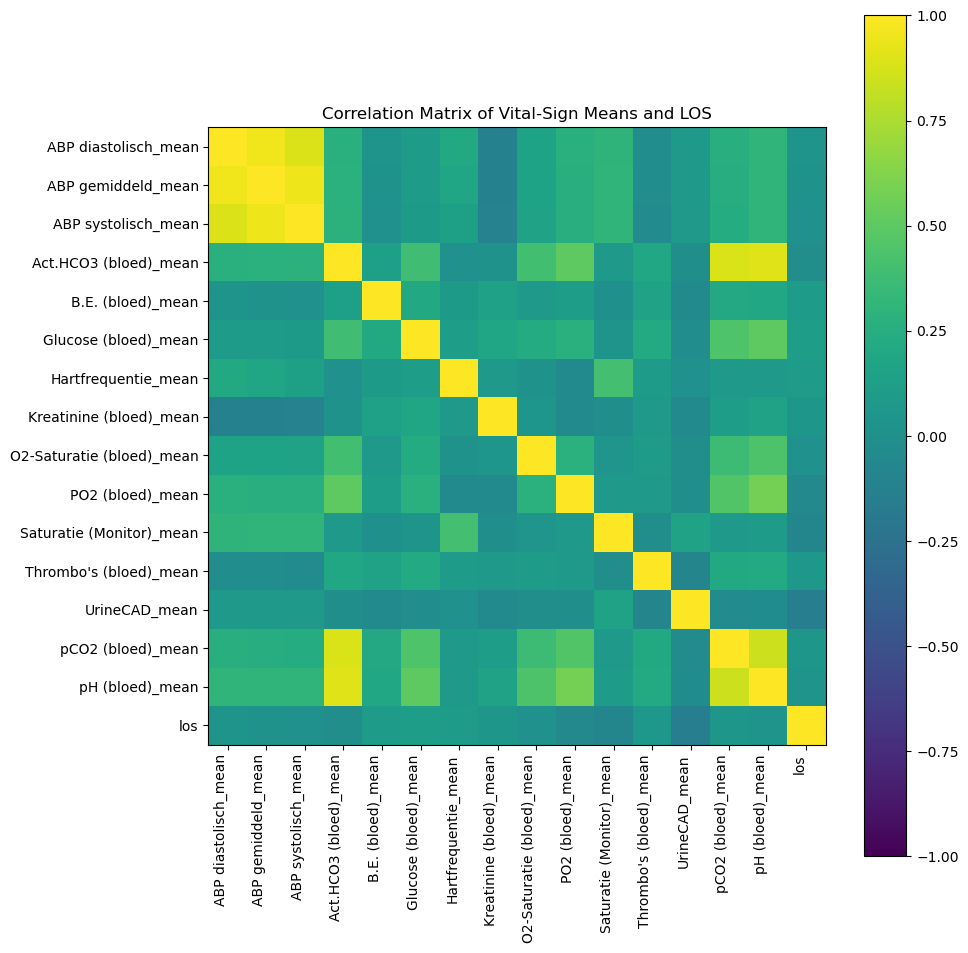

In [268]:

mean_cols = [c for c in df_merged.columns if c.endswith('_mean')]
corr_cols = mean_cols + ['los']

corr = df_merged[corr_cols].corr()

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(corr, vmin=-1, vmax=1)     # scale from –1 to +1
ax.set_xticks(range(len(corr_cols)))
ax.set_yticks(range(len(corr_cols)))
ax.set_xticklabels(corr_cols, rotation=90, ha='right')
ax.set_yticklabels(corr_cols)
fig.colorbar(cax, ax=ax)
plt.title('Correlation Matrix of Vital‐Sign Means and LOS')
plt.tight_layout()
plt.show()


## DRUG TABLE

In [31]:
df_drug = pd.read_csv("drugitems.csv", encoding="ISO-8859-1")

In [33]:
df_drug

,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,rate,rateunit,...,action,start,stop,duration,solutionitemid,solutionitem,solutionadministered,solutionadministeredunit,fluidin,iscontinuous
0,0,1994485,15,Injecties Antimicrobiele middelen,9152,Cefazoline (Kefzol),0,0,0.0,NaN,...,Nieuwe toediening,20100000,20160000,1,8987.0,"NaCl 0,9% Medicatie",0.0,ml,0.0,0
1,0,1995066,15,Injecties Antimicrobiele middelen,9152,Cefazoline (Kefzol),0,0,0.0,NaN,...,Nieuwe toediening,52500000,52560000,1,8987.0,"NaCl 0,9% Medicatie",0.0,ml,0.0,0
2,0,1995793,15,Injecties Antimicrobiele middelen,9152,Cefazoline (Kefzol),0,0,0.0,NaN,...,Nieuwe toediening,84900000,84960000,1,8987.0,"NaCl 0,9% Medicatie",0.0,ml,0.0,0
3,0,1994602,17,Infuus - Colloid,7252,Gelofusine,0,0,NaN,NaN,...,Nieuwe zak,30540000,34140000,60,NaN,NaN,NaN,NaN,500.0,0
4,0,1994826,17,Infuus - Colloid,7252,Gelofusine,0,0,NaN,NaN,...,Nieuwe zak,45780000,49380000,60,NaN,NaN,NaN,NaN,500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907264,23552,6291603,56,Voeding Vast voedsel,14972,1/2 cupje margarine (10g)/roomboter,0,0,NaN,NaN,...,Nieuwe portie,68220000,68280000,1,NaN,NaN,NaN,NaN,0.0,0
4907265,23552,6291602,56,Voeding Vast voedsel,14982,1 plak kaas,0,0,NaN,NaN,...,Nieuwe portie,68220000,68280000,1,NaN,NaN,NaN,NaN,0.0,0
4907266,23552,6290825,69,Niet iv Zalven/Crèmes/Druppels,12947,Mupirocine (Bactroban) zalf,0,0,NaN,NaN,...,Nieuwe toediening,15300000,15360000,1,NaN,NaN,NaN,NaN,0.0,0
4907267,23552,6291591,69,Niet iv Zalven/Crèmes/Druppels,12947,Mupirocine (Bactroban) zalf,0,0,NaN,NaN,...,Nieuwe toediening,57180000,57240000,1,NaN,NaN,NaN,NaN,0.0,0


In [37]:
limit = 6 * 3600 * 1000  # 6 hours

df_drug_filtered = df_drug[df_drug['start'] <= limit]
df_drug_filtered

,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,rate,rateunit,...,action,start,stop,duration,solutionitemid,solutionitem,solutionadministered,solutionadministeredunit,fluidin,iscontinuous
0,0,1994485,15,Injecties Antimicrobiele middelen,9152,Cefazoline (Kefzol),0,0,0.0,NaN,...,Nieuwe toediening,20100000,20160000,1,8987.0,"NaCl 0,9% Medicatie",0.0,ml,0.0,0
18,0,1994484,55,Infuus - Crystalloid,7148,Magnesiumsulfaat (MgSO4),1,0,NaN,NaN,...,Nieuwe toediening,20520000,48180000,461,NaN,NaN,NaN,NaN,0.0,0
19,0,1994484,55,Infuus - Crystalloid,7291,"NaCl 0,45%/Glucose 2,5%",0,0,NaN,NaN,...,Nieuwe zak,20520000,48180000,461,NaN,NaN,NaN,NaN,500.0,0
28,0,1994484,55,Infuus - Crystalloid,7412,Calcium Glubionaat (Calcium Sandoz),1,0,NaN,NaN,...,Nieuwe toediening,20520000,48180000,461,NaN,NaN,NaN,NaN,0.0,0
29,0,1994483,55,Infuus - Crystalloid,8937,Drukzak,0,0,NaN,NaN,...,Nieuwe zak,20520000,140520000,2000,NaN,NaN,NaN,NaN,500.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907250,23552,6290364,23,Injecties CZS/Sedatie/Analgetica,7225,Morfine,0,0,NaN,NaN,...,Nieuwe toediening,4620000,4680000,1,NaN,NaN,NaN,NaN,0.0,0
4907252,23552,6290516,29,Niet iv CZS/Sedatie/Analgetica,6891,Paracetamol,0,0,NaN,NaN,...,Nieuwe toediening,6780000,6840000,1,NaN,NaN,NaN,NaN,0.0,0
4907253,23552,6290816,29,Niet iv CZS/Sedatie/Analgetica,6891,Paracetamol,0,0,NaN,NaN,...,Nieuwe toediening,21180000,21240000,1,NaN,NaN,NaN,NaN,0.0,0
4907259,23552,6290814,55,Infuus - Crystalloid,7293,"NaCl 0,9 %",0,0,NaN,NaN,...,Nieuwe zak,480000,21900000,357,NaN,NaN,NaN,NaN,500.0,1


In [41]:
df_drug_filtered[df_drug_filtered['start'] < 0]

,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,rate,rateunit,...,action,start,stop,duration,solutionitemid,solutionitem,solutionadministered,solutionadministeredunit,fluidin,iscontinuous
718058,3580,678369,55,Infuus - Crystalloid,7148,Magnesiumsulfaat (MgSO4),1,0,NaN,NaN,...,Nieuwe toediening,-600000,27120000,462,NaN,NaN,NaN,NaN,0.00000,0
718059,3580,678369,55,Infuus - Crystalloid,7291,"NaCl 0,45%/Glucose 2,5%",0,0,NaN,NaN,...,Nieuwe zak,-600000,27120000,462,NaN,NaN,NaN,NaN,500.00000,0
718062,3580,678369,55,Infuus - Crystalloid,7412,Calcium Glubionaat (Calcium Sandoz),1,0,NaN,NaN,...,Nieuwe toediening,-600000,27120000,462,NaN,NaN,NaN,NaN,0.00000,0
718063,3580,678368,55,Infuus - Crystalloid,8937,Drukzak,0,0,NaN,NaN,...,Nieuwe zak,-600000,23880000,408,NaN,NaN,NaN,NaN,102.00000,0
718075,3580,678381,65,2. Spuitpompen,9424,"NaCL 0,9% spuit",0,0,3.0,ml/uur,...,Nieuwe spuit,-600000,24600000,420,8990.0,"NaCl 0,9% Pompen",21.0,ml,21.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868339,23336,754796,114,Voeding Enteraal,12586,Nutrison Standaard,0,0,NaN,NaN,...,Nieuwe zak,-59040000,62520000,2026,NaN,NaN,NaN,NaN,675.29999,1
4878910,23370,821234,55,Infuus - Crystalloid,7148,Magnesiumsulfaat (MgSO4),1,0,NaN,NaN,...,Nieuwe toediening,-180000,27540000,462,NaN,NaN,NaN,NaN,0.00000,0
4878911,23370,821234,55,Infuus - Crystalloid,7291,"NaCl 0,45%/Glucose 2,5%",0,0,NaN,NaN,...,Nieuwe zak,-180000,27540000,462,NaN,NaN,NaN,NaN,500.00000,0
4878914,23370,821234,55,Infuus - Crystalloid,7412,Calcium Glubionaat (Calcium Sandoz),1,0,NaN,NaN,...,Nieuwe toediening,-180000,27540000,462,NaN,NaN,NaN,NaN,0.00000,0


336 rows are before admission, so we will remove these. 

In [45]:
df_drug_filtered = df_drug_filtered[df_drug_filtered['start'] >= 0]

In [51]:
df_drug_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308402 entries, 0 to 4907266
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   admissionid               308402 non-null  int64  
 1   orderid                   308402 non-null  int64  
 2   ordercategoryid           308402 non-null  int64  
 3   ordercategory             308402 non-null  object 
 4   itemid                    308402 non-null  int64  
 5   item                      308402 non-null  object 
 6   isadditive                308402 non-null  int64  
 7   isconditional             308402 non-null  int64  
 8   rate                      167967 non-null  float64
 9   rateunit                  135802 non-null  object 
 10  rateunitid                135802 non-null  float64
 11  ratetimeunitid            135802 non-null  float64
 12  doserateperkg             308402 non-null  int64  
 13  dose                      308402 non-null  float

Including only the medications given in the first six hours leads to 308402 rows. 

In [55]:
cols = ['admissionid', 'orderid', 'ordercategoryid', 'ordercategory', 'itemid', 'item', 'isadditive', 'isconditional', 'doserateperkg', 'dose', 'doseunit', 'action', 'start', 'stop', 'duration']
df_drug_filtered2 = df_drug_filtered[cols]

In [65]:
df_drug_filtered2

,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,doserateperkg,dose,doseunit,action,start,stop,duration
0,0,1994485,15,Injecties Antimicrobiele middelen,9152,Cefazoline (Kefzol),0,0,0,1.00,g,Nieuwe toediening,20100000,20160000,1
18,0,1994484,55,Infuus - Crystalloid,7148,Magnesiumsulfaat (MgSO4),1,0,0,2.00,g,Nieuwe toediening,20520000,48180000,461
19,0,1994484,55,Infuus - Crystalloid,7291,"NaCl 0,45%/Glucose 2,5%",0,0,0,65.00,ml,Nieuwe zak,20520000,48180000,461
28,0,1994484,55,Infuus - Crystalloid,7412,Calcium Glubionaat (Calcium Sandoz),1,0,0,2.75,g,Nieuwe toediening,20520000,48180000,461
29,0,1994483,55,Infuus - Crystalloid,8937,Drukzak,0,0,0,15.00,ml,Nieuwe zak,20520000,140520000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907250,23552,6290364,23,Injecties CZS/Sedatie/Analgetica,7225,Morfine,0,0,0,2.50,mg,Nieuwe toediening,4620000,4680000,1
4907252,23552,6290516,29,Niet iv CZS/Sedatie/Analgetica,6891,Paracetamol,0,0,0,1000.00,mg,Nieuwe toediening,6780000,6840000,1
4907253,23552,6290816,29,Niet iv CZS/Sedatie/Analgetica,6891,Paracetamol,0,0,0,1000.00,mg,Nieuwe toediening,21180000,21240000,1
4907259,23552,6290814,55,Infuus - Crystalloid,7293,"NaCl 0,9 %",0,0,0,84.00,ml,Nieuwe zak,480000,21900000,357


In [67]:
df_drug_filtered2['item'].value_counts()

item
NaCL 0,9% spuit                   28744
Propofol (Diprivan)               26858
Drukzak                           21169
NaCl 0,45%/Glucose 2,5%           19337
Noradrenaline (Norepinefrine)     18955
                                  ...  
1/4 portie macaroni/spaghetti         1
Terbutaline sulfaat (Bricanyl)        1
3/4 portie nagerecht                  1
Vamin 14                              1
Soep (Gebonden) 100ml                 1
Name: count, Length: 725, dtype: int64

In [72]:
df_drug_filtered2['item'].value_counts().head(30)

item
NaCL 0,9% spuit                        28744
Propofol (Diprivan)                    26858
Drukzak                                21169
NaCl 0,45%/Glucose 2,5%                19337
Noradrenaline (Norepinefrine)          18955
Dopamine (Inotropin)                   12820
Magnesiumsulfaat (MgSO4)               12417
NaCl 0,9 %                             11651
Gelofusine                              9777
Ri-Lac (Ringers lactaat)                9031
Fentanyl                                8897
Paracetamol                             8674
Morfine                                 8388
Cefazoline (Kefzol)                     6973
Actrapid (Insuline)                     6816
Calcium Glubionaat (Calcium Sandoz)     6572
Kaliumchloride (KCL)                    5470
Nitroglycerine (Nitro-pohl)             5153
Insuline aspart (Novorapid)             4364
Gefiltreerde Ery's                      4113
Midazolam (Dormicum)                    3280
Fresh Frozen Plasma                     2536
Thiam

In [69]:
df_drug_filtered2['ordercategory'].value_counts()

ordercategory
2. Spuitpompen                            135801
Infuus - Crystalloid                       80320
Injecties Antimicrobiele middelen          15744
Injecties CZS/Sedatie/Analgetica           13276
Injecties Hormonen/Vitaminen/Mineralen     10616
Infuus - Colloid                           10399
Infuus - Bloedproducten                     7611
Niet iv CZS/Sedatie/Analgetica              7485
Niet iv Antimicrobiele middelen             4243
Injecties Haematologisch                    4153
Voeding Drinken                             3375
Injecties Tractus Digestivus                2256
Niet iv Zalven/Crèmes/Druppels              2092
Niet iv Circulatie/Diurese                  1630
Niet iv Tractus Respiratorius               1619
Niet iv Overig                              1549
Niet iv Tractus Digestivus                   994
Injecties Circulatie/Diuretica               907
Voeding Enteraal                             901
Voeding Vast voedsel                         873
Resear

There are 725 different items, and 26 categories.

In [221]:
top30 = df_drug_filtered2['item'] \
    .value_counts() \
    .head(30) \
    .index.tolist()

df_top30 = df_drug_filtered2[df_drug_filtered2['item'].isin(top30)]

admission_counts = (
    df_top30
    .groupby('item')['admissionid']
    .nunique()                   # how many distinct admissions per item
    .reindex(top30)              # keep the same order as top30
    .reset_index(name='n_admissions')
)
admission_counts.sort_values(by='n_admissions', ascending=False)

,ordercategory,n_admissions
1,Infuus - Crystalloid,19597
0,2. Spuitpompen,16930
2,Injecties Antimicrobiele middelen,12176
3,Injecties CZS/Sedatie/Analgetica,7259
4,Injecties Hormonen/Vitaminen/Mineralen,6985
5,Infuus - Colloid,6615
7,Niet iv CZS/Sedatie/Analgetica,6206
6,Infuus - Bloedproducten,3423
9,Injecties Haematologisch,3362
8,Niet iv Antimicrobiele middelen,2334


In [493]:
top30 = df_drug_filtered2['item'].value_counts().head(30).index.tolist()

df_top30 = df_drug_filtered2[df_drug_filtered2['item'].isin(top30)]

valid_ids = df['admissionid'].unique()

df_top30_valid = df_top30[df_top30['admissionid'].isin(valid_ids)]

admission_counts_valid = (
    df_top30_valid
    .groupby('item')['admissionid']
    .nunique()                     
    .reindex(top30)                 
    .reset_index(name='n_admissions')
)

total_admissions = len(valid_ids)

admission_counts_valid['pct_admissions'] = (admission_counts_valid['n_admissions'] / total_admissions * 100).round(2)   
admission_counts_valid.sort_values(by='n_admissions', ascending=False)


,item,n_admissions,pct_admissions
2,Drukzak,15546,86.71
3,"NaCl 0,45%/Glucose 2,5%",13577,75.73
1,Propofol (Diprivan),11366,63.39
0,"NaCL 0,9% spuit",11164,62.27
6,Magnesiumsulfaat (MgSO4),10313,57.52
11,Paracetamol,8044,44.87
13,Cefazoline (Kefzol),6850,38.21
7,"NaCl 0,9 %",6548,36.52
15,Calcium Glubionaat (Calcium Sandoz),5994,33.43
5,Dopamine (Inotropin),5735,31.99


In [312]:
morf = df_drug_filtered2[df_drug_filtered2['item'] == 'Paracetamol']
morf['dose'].value_counts()

dose
1000.0     8551
500.0        91
1.0          22
100.0         4
750.0         2
10000.0       1
600.0         1
450.0         1
700.0         1
Name: count, dtype: int64

## Make binary flags for Ordercategory

In [504]:
dummies = pd.get_dummies(
    df_drug_filtered2['ordercategory'],
    prefix='oc',         
    dtype=int
)

dummies['admissionid'] = df_drug_filtered2['admissionid']

flags = (
    dummies
      .groupby('admissionid')
      .max()
      .reset_index()
)

df_merged2 = df_merged.merge(
    flags,
    on='admissionid',
    how='left'
)

df_merged2

,patientid,admissionid,location,admissionyeargroup,agegroup,weightgroup,heightgroup,specialty,los_days,ABP diastolisch_mean,...,oc_Niet iv Overig,oc_Niet iv Tractus Digestivus,oc_Niet iv Tractus Respiratorius,oc_Niet iv Zalven/Crèmes/Druppels,oc_Research,oc_Voeding Drinken,oc_Voeding Enteraal,oc_Voeding Enteraal oud,oc_Voeding Parenteraal,oc_Voeding Vast voedsel
0,0,0,IC,2003-2009,80+,60-69,160-169,Cardiochirurgie,1.750000,49.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,IC,2010-2016,60-69,70-79,170-179,Cardiochirurgie,1.083333,59.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,IC,2010-2016,60-69,90-99,180-189,Cardiochirurgie,0.958333,66.285714,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,IC,2003-2009,50-59,90-99,180-189,Cardiochirurgie,0.958333,79.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,IC&MC,2010-2016,70-79,70-79,170-179,Cardiochirurgie,2.083333,51.219780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17881,20319,23545,MC,2010-2016,18-39,60-69,160-169,Traumatologie,5.458333,63.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17882,20320,23546,IC,2010-2016,60-69,80-89,190+,Cardiologie,4.083333,73.310897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17883,20322,23548,IC&MC,2010-2016,40-49,70-79,180-189,Neurochirurgie,11.000000,84.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17884,20323,23549,MC,2010-2016,40-49,60-69,160-169,Nefrologie,0.666667,-1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [510]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17886 entries, 0 to 17885
Data columns (total 66 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   patientid                                  17886 non-null  int64  
 1   admissionid                                17886 non-null  int64  
 2   location                                   17886 non-null  object 
 3   admissionyeargroup                         17886 non-null  object 
 4   agegroup                                   17886 non-null  object 
 5   weightgroup                                17421 non-null  object 
 6   heightgroup                                17032 non-null  object 
 7   specialty                                  16974 non-null  object 
 8   los_days                                   17886 non-null  float64
 9   ABP diastolisch_mean                       17886 non-null  float64
 10  ABP gemiddeld_mean    

## Create Meds variables (top N)

In [319]:
keep_items = (
    admission_counts_valid
      .loc[admission_counts_valid['pct_admissions'] > 5.38, 'item']
      .tolist()
)

df_highpct = df_drug_filtered2[df_drug_filtered2['item'].isin(keep_items)].copy()

df_highpct


,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,doserateperkg,dose,doseunit,action,start,stop,duration
0,0,1994485,15,Injecties Antimicrobiele middelen,9152,Cefazoline (Kefzol),0,0,0,1.00,g,Nieuwe toediening,20100000,20160000,1
18,0,1994484,55,Infuus - Crystalloid,7148,Magnesiumsulfaat (MgSO4),1,0,0,2.00,g,Nieuwe toediening,20520000,48180000,461
19,0,1994484,55,Infuus - Crystalloid,7291,"NaCl 0,45%/Glucose 2,5%",0,0,0,65.00,ml,Nieuwe zak,20520000,48180000,461
28,0,1994484,55,Infuus - Crystalloid,7412,Calcium Glubionaat (Calcium Sandoz),1,0,0,2.75,g,Nieuwe toediening,20520000,48180000,461
29,0,1994483,55,Infuus - Crystalloid,8937,Drukzak,0,0,0,15.00,ml,Nieuwe zak,20520000,140520000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907240,23551,2600574,65,2. Spuitpompen,9001,Kaliumchloride (KCL),0,0,0,8.00,mmol,Nieuwe spuit,11100000,29100000,300
4907250,23552,6290364,23,Injecties CZS/Sedatie/Analgetica,7225,Morfine,0,0,0,2.50,mg,Nieuwe toediening,4620000,4680000,1
4907252,23552,6290516,29,Niet iv CZS/Sedatie/Analgetica,6891,Paracetamol,0,0,0,1000.00,mg,Nieuwe toediening,6780000,6840000,1
4907253,23552,6290816,29,Niet iv CZS/Sedatie/Analgetica,6891,Paracetamol,0,0,0,1000.00,mg,Nieuwe toediening,21180000,21240000,1


In [321]:
units_per_med = (
    df_highpct
      .groupby('item')['doseunit']
      .unique()
      .reset_index(name='unique_units')
)
units_per_med

,item,unique_units
0,Actrapid (Insuline),[IE]
1,Calcium Glubionaat (Calcium Sandoz),"[g, mg]"
2,Calciumgluconaat 10%,"[g, mg]"
3,Cefazoline (Kefzol),"[g, mg]"
4,Cefotaxim (Claforan),"[g, mg]"
5,Dopamine (Inotropin),"[mg, µg]"
6,Drukzak,[ml]
7,Fentanyl,"[mg, µg]"
8,Fresh Frozen Plasma,[ml]
9,Gefiltreerde Ery's,[ml]


In [401]:
morf = df_highpct[df_highpct['item'] == 'SDD pasta (4 x dgs)']
morf['doseunit'].value_counts()

doseunit
Lik     1775
Geen      51
Name: count, dtype: int64

In [403]:
morf = df_drug_filtered2[df_drug_filtered2['item'] == 'SDD pasta (4 x dgs)']

combo_counts = (
    morf[['dose','doseunit']]
      .value_counts()
      .reset_index(name='count')
)

combo_counts

,dose,doseunit,count
0,1.0,Lik,1775
1,1.0,Geen,47
2,2.0,Geen,2
3,4.0,Geen,1
4,6.0,Geen,1


For paracetamol: 1000.0 g has to be a mistake (should be mg), 1.0 g needs to be converted to mg (20)

Calcium Glubionaat: convert mgs to g (only 53)

Calciumgluconaat 10%: convert mgs to g (only 44)

cefazoline: convert mgs to g (only 2)

cefotaxim: convert mgs to g (only 1)

dopamine: convert micrograms to mg (23)

fentanyl: convert micrograms to mg (166)

Nitroglycerine (Nitro-pohl): convert micrograms to mg (26)

Noradrenaline (Norepinefrine): convert microgram to mg (4)


In [399]:
mask = (
    (df_highpct['item']     == 'Noradrenaline (Norepinefrine)') &
    (df_highpct['doseunit'].isin(['µg', 'mcg', 'microgram', 'micrograms']))
)

# How many will be changed?
print("Rows to convert:", mask.sum())

# Convert dose from µg to mg, and update unit
df_highpct.loc[mask, 'dose']     = df_highpct.loc[mask, 'dose'] / 1000
df_highpct.loc[mask, 'doseunit'] = 'mg'

# Verify no more microgram rows remain
remaining = ((df_highpct['item'] == 'Noradrenaline (Norepinefrine)') &
             (df_highpct['doseunit'] != 'mg')).sum()
print("Remaining non-mg rows for Noradrenaline (Norepinefrine):", remaining)

# Show a sample of updated rows
print(df_highpct.loc[
    df_highpct['item'] == 'Noradrenaline (Norepinefrine)',
    ['dose','doseunit']
].drop_duplicates().head())


Rows to convert: 4
Remaining non-mg rows for Noradrenaline (Norepinefrine): 0
     dose doseunit
138   0.4       mg
139   0.6       mg
141   0.2       mg
353   0.8       mg
355   0.1       mg


In [412]:
df_highpct

,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,doserateperkg,dose,doseunit,action,start,stop,duration
0,0,1994485,15,Injecties Antimicrobiele middelen,9152,Cefazoline (Kefzol),0,0,0,1.00,g,Nieuwe toediening,20100000,20160000,1
18,0,1994484,55,Infuus - Crystalloid,7148,Magnesiumsulfaat (MgSO4),1,0,0,2.00,g,Nieuwe toediening,20520000,48180000,461
19,0,1994484,55,Infuus - Crystalloid,7291,"NaCl 0,45%/Glucose 2,5%",0,0,0,65.00,ml,Nieuwe zak,20520000,48180000,461
28,0,1994484,55,Infuus - Crystalloid,7412,Calcium Glubionaat (Calcium Sandoz),1,0,0,2.75,g,Nieuwe toediening,20520000,48180000,461
29,0,1994483,55,Infuus - Crystalloid,8937,Drukzak,0,0,0,15.00,ml,Nieuwe zak,20520000,140520000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907240,23551,2600574,65,2. Spuitpompen,9001,Kaliumchloride (KCL),0,0,0,8.00,mmol,Nieuwe spuit,11100000,29100000,300
4907250,23552,6290364,23,Injecties CZS/Sedatie/Analgetica,7225,Morfine,0,0,0,2.50,mg,Nieuwe toediening,4620000,4680000,1
4907252,23552,6290516,29,Niet iv CZS/Sedatie/Analgetica,6891,Paracetamol,0,0,0,1000.00,mg,Nieuwe toediening,6780000,6840000,1
4907253,23552,6290816,29,Niet iv CZS/Sedatie/Analgetica,6891,Paracetamol,0,0,0,1000.00,mg,Nieuwe toediening,21180000,21240000,1


In [414]:
#create new variables for medications

med_stats = (
    df_highpct
      .groupby(['admissionid', 'item'])['dose']
      .agg(mean_dose='mean', total_dose='sum')
      .reset_index()
)


df_med_wide = med_stats.pivot(
    index='admissionid',
    columns='item',
    values=['mean_dose', 'total_dose']
)

df_med_wide.columns = [
    f"{med}_{stat}" for stat, med in df_med_wide.columns
]

df_med_wide = df_med_wide.reset_index()

df_med_wide

,admissionid,Actrapid (Insuline)_mean_dose,Calcium Glubionaat (Calcium Sandoz)_mean_dose,Calciumgluconaat 10%_mean_dose,Cefazoline (Kefzol)_mean_dose,Cefotaxim (Claforan)_mean_dose,Dopamine (Inotropin)_mean_dose,Drukzak_mean_dose,Fentanyl_mean_dose,Fresh Frozen Plasma_mean_dose,...,"NaCl 0,9 %_total_dose",Natrium-kalium-fosfaat_total_dose,Nitroglycerine (Nitro-pohl)_total_dose,Noradrenaline (Norepinefrine)_total_dose,Paracetamol_total_dose,Propofol (Diprivan)_total_dose,Ri-Lac (Ringers lactaat)_total_dose,SDD drank (4 x dgs)_total_dose,SDD pasta (4 x dgs)_total_dose,Thiamine (Vitamine B1)_total_dose
0,0,NaN,2.75,NaN,1.0,NaN,NaN,15.0,NaN,NaN,...,NaN,NaN,0.5,NaN,NaN,100.00,NaN,NaN,NaN,NaN
1,1,NaN,2.75,NaN,1.0,NaN,8.0,17.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,139.86,NaN,NaN,NaN,NaN
2,2,NaN,2.75,NaN,1.0,NaN,NaN,15.0,NaN,250.0,...,NaN,NaN,NaN,1.6,1000.0,200.00,NaN,NaN,NaN,NaN
3,3,NaN,2.75,NaN,1.0,NaN,NaN,15.0,NaN,NaN,...,250.0,NaN,0.5,NaN,NaN,800.00,NaN,NaN,NaN,NaN
4,4,NaN,NaN,2.0,1.0,NaN,20.0,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1000.0,240.00,2000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,23548,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.100,NaN,...,84.0,NaN,NaN,0.7,1000.0,600.00,NaN,NaN,NaN,NaN
19710,23549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN
19711,23550,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
19712,23551,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.115,NaN,...,NaN,NaN,NaN,0.2,NaN,900.00,NaN,NaN,NaN,NaN


In [420]:
df_med_wide = df_med_wide.fillna(0)
df_med_wide

,admissionid,Actrapid (Insuline)_mean_dose,Calcium Glubionaat (Calcium Sandoz)_mean_dose,Calciumgluconaat 10%_mean_dose,Cefazoline (Kefzol)_mean_dose,Cefotaxim (Claforan)_mean_dose,Dopamine (Inotropin)_mean_dose,Drukzak_mean_dose,Fentanyl_mean_dose,Fresh Frozen Plasma_mean_dose,...,"NaCl 0,9 %_total_dose",Natrium-kalium-fosfaat_total_dose,Nitroglycerine (Nitro-pohl)_total_dose,Noradrenaline (Norepinefrine)_total_dose,Paracetamol_total_dose,Propofol (Diprivan)_total_dose,Ri-Lac (Ringers lactaat)_total_dose,SDD drank (4 x dgs)_total_dose,SDD pasta (4 x dgs)_total_dose,Thiamine (Vitamine B1)_total_dose
0,0,0.0,2.75,0.0,1.0,0.0,0.0,15.0,0.000,0.0,...,0.0,0.0,0.5,0.0,0.0,100.00,0.0,0.0,0.0,0.0
1,1,0.0,2.75,0.0,1.0,0.0,8.0,17.5,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,139.86,0.0,0.0,0.0,0.0
2,2,0.0,2.75,0.0,1.0,0.0,0.0,15.0,0.000,250.0,...,0.0,0.0,0.0,1.6,1000.0,200.00,0.0,0.0,0.0,0.0
3,3,0.0,2.75,0.0,1.0,0.0,0.0,15.0,0.000,0.0,...,250.0,0.0,0.5,0.0,0.0,800.00,0.0,0.0,0.0,0.0
4,4,0.0,0.00,2.0,1.0,0.0,20.0,15.0,0.000,0.0,...,0.0,0.0,0.0,0.0,1000.0,240.00,2000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,23548,0.0,0.00,0.0,0.0,0.0,0.0,10.0,0.100,0.0,...,84.0,0.0,0.0,0.7,1000.0,600.00,0.0,0.0,0.0,0.0
19710,23549,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0
19711,23550,0.0,0.00,0.0,0.0,0.0,0.0,5.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,2000.0,0.0,0.0,0.0
19712,23551,0.0,0.00,0.0,0.0,0.0,0.0,10.0,0.115,0.0,...,0.0,0.0,0.0,0.2,0.0,900.00,0.0,0.0,0.0,0.0


In [422]:
# Merge with Orginal Dataframe

df_merged3 = df_merged2.merge(
    df_med_wide,
    on='admissionid',
    how='left'
)

df_merged3

,patientid,admissionid,location,admissionyeargroup,agegroup,weightgroup,heightgroup,specialty,los_days,ABP diastolisch_mean,...,"NaCl 0,9 %_total_dose",Natrium-kalium-fosfaat_total_dose,Nitroglycerine (Nitro-pohl)_total_dose,Noradrenaline (Norepinefrine)_total_dose,Paracetamol_total_dose,Propofol (Diprivan)_total_dose,Ri-Lac (Ringers lactaat)_total_dose,SDD drank (4 x dgs)_total_dose,SDD pasta (4 x dgs)_total_dose,Thiamine (Vitamine B1)_total_dose
0,0,0,IC,2003-2009,80+,60-69,160-169,Cardiochirurgie,1.750000,49.000000,...,0.0,0.0,0.5,0.0,0.0,100.00,0.0,0.0,0.0,0.0
1,1,1,IC,2010-2016,60-69,70-79,170-179,Cardiochirurgie,1.083333,59.500000,...,0.0,0.0,0.0,0.0,0.0,139.86,0.0,0.0,0.0,0.0
2,2,2,IC,2010-2016,60-69,90-99,180-189,Cardiochirurgie,0.958333,66.285714,...,0.0,0.0,0.0,1.6,1000.0,200.00,0.0,0.0,0.0,0.0
3,3,3,IC,2003-2009,50-59,90-99,180-189,Cardiochirurgie,0.958333,79.200000,...,250.0,0.0,0.5,0.0,0.0,800.00,0.0,0.0,0.0,0.0
4,4,4,IC&MC,2010-2016,70-79,70-79,170-179,Cardiochirurgie,2.083333,51.219780,...,0.0,0.0,0.0,0.0,1000.0,240.00,2000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17970,20319,23545,MC,2010-2016,18-39,60-69,160-169,Traumatologie,5.458333,63.000000,...,0.0,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0
17971,20320,23546,IC,2010-2016,60-69,80-89,190+,Cardiologie,4.083333,73.310897,...,1000.0,0.0,0.0,0.6,0.0,360.00,2000.0,10.0,1.0,0.0
17972,20322,23548,IC&MC,2010-2016,40-49,70-79,180-189,Neurochirurgie,11.000000,84.666667,...,84.0,0.0,0.0,0.7,1000.0,600.00,0.0,0.0,0.0,0.0
17973,20323,23549,MC,2010-2016,40-49,60-69,160-169,Nefrologie,0.666667,-1.000000,...,0.0,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0


In [424]:
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17975 entries, 0 to 17974
Columns: 122 entries, patientid to Thiamine (Vitamine B1)_total_dose
dtypes: float64(113), int32(1), int64(2), object(6)
memory usage: 16.7+ MB


In [82]:
listitems = pd.read_csv("listitems.csv", encoding="ISO-8859-1")

In [83]:
listitems

,admissionid,itemid,item,valueid,value,measuredat,registeredat,registeredby,updatedat,updatedby,islabresult
0,0,6671,Hartritme,1,NSR,20520000,21480000.0,ICV_IC-Verpleegkundig,21480000,ICV_IC-Verpleegkundig,0
1,0,6671,Hartritme,1,NSR,22320000,29400000.0,ICV_IC-Verpleegkundig,29400000,ICV_IC-Verpleegkundig,0
2,0,6671,Hartritme,1,NSR,25920000,29460000.0,ICV_IC-Verpleegkundig,29460000,ICV_IC-Verpleegkundig,0
3,0,6671,Hartritme,1,NSR,29520000,29460000.0,ICV_IC-Verpleegkundig,29460000,ICV_IC-Verpleegkundig,0
4,0,6671,Hartritme,1,NSR,33120000,33300000.0,ICV_IC-Verpleegkundig,33300000,ICV_IC-Verpleegkundig,0
...,...,...,...,...,...,...,...,...,...,...,...
30744060,23552,19640,V_EMV_NICE_Opname,20,Helder en adequaat (communicatie mogelijk),1680000,4740000.0,ANES_Anesthesiologie,4740000,ANES_Anesthesiologie,0
30744061,23552,19640,V_EMV_NICE_Opname,20,Helder en adequaat (communicatie mogelijk),14400000,14640000.0,ANES_Anesthesiologie,14640000,ANES_Anesthesiologie,0
30744062,23552,19640,V_EMV_NICE_Opname,20,Helder en adequaat (communicatie mogelijk),64800000,237960000.0,ICV_Administratief,237960000,ICV_Administratief,0
30744063,23552,19796,Aandacht - fysiek -Status01,1,Actief,31260000,31320000.0,ICV_MC-Verpleegkundig,31320000,ICV_MC-Verpleegkundig,0


In [92]:
limit = 6 * 3600 * 1000  # 6 hours

df_list_filtered = listitems[(listitems['measuredat'] >= 0) & (listitems['measuredat'] <= limit)]
df_list_filtered

,admissionid,itemid,item,valueid,value,measuredat,registeredat,registeredby,updatedat,updatedby,islabresult
0,0,6671,Hartritme,1,NSR,20520000,21480000.0,ICV_IC-Verpleegkundig,21480000,ICV_IC-Verpleegkundig,0
54,0,8668,Thoraxdrain1 Plaats,3,Mediastinaal,20520000,21060000.0,ICV_IC-Verpleegkundig,21060000,ICV_IC-Verpleegkundig,0
65,0,8691,Thoraxdrain1 Zuigkracht,4,- 20 cm H2O,20520000,21060000.0,ICV_IC-Verpleegkundig,21060000,ICV_IC-Verpleegkundig,0
76,0,8695,Thoraxdrain1 Luchtlekkage,1,+,20520000,29220000.0,ICV_IC-Verpleegkundig,29220000,ICV_IC-Verpleegkundig,0
87,0,8730,Wonddrain1 Plaats,8,Onderbeen Li,20520000,23520000.0,ICV_IC-Verpleegkundig,23520000,ICV_IC-Verpleegkundig,0
...,...,...,...,...,...,...,...,...,...,...,...
30744056,23552,19639,M_EMV_NICE_Opname,18,Volgt verbale commando's op,1680000,4740000.0,ANES_Anesthesiologie,4740000,ANES_Anesthesiologie,0
30744057,23552,19639,M_EMV_NICE_Opname,18,Volgt verbale commando's op,14400000,14640000.0,ANES_Anesthesiologie,14640000,ANES_Anesthesiologie,0
30744059,23552,19640,V_EMV_NICE_Opname,20,Helder en adequaat (communicatie mogelijk),1680000,3652000.0,ANES_Anesthesiologie,3652000,ANES_Anesthesiologie,0
30744060,23552,19640,V_EMV_NICE_Opname,20,Helder en adequaat (communicatie mogelijk),1680000,4740000.0,ANES_Anesthesiologie,4740000,ANES_Anesthesiologie,0


In [94]:
df_list_filtered['item'].value_counts().head(30)

item
Ventilatie Mode (Set)                934190
Hartritme                             92217
Locatie plaatsing                     44099
Bedsoort                              33797
NIV Program Status (Set)              29246
D_Hoofdgroep                          26947
Thoraxdrain1 Plaats                   25890
Thoraxdrain1 Zuigkracht               25620
NICE Herkomst                         25566
Thoraxdrain1 Transport                24510
Toedieningsweg                        24199
Pupil Links Grootte                   24014
Pupil Rechts Grootte                  23943
Pupil Links Reactie                   23293
Pupil Rechts Reactie                  23115
Thoraxdrain1 Luchtlekkage             22947
Houding patiënt                       21550
PatiëntGeslacht                       16779
Opname Sepsis                         15885
Actief openen van de ogen             15587
Beste verbale reactie                 15232
NICE Opname type                      15227
Beste motore reactie van de

In [98]:
top30 = df_list_filtered['item'] \
    .value_counts() \
    .head(30) \
    .index.tolist()

df_top30 = df_list_filtered[df_list_filtered['item'].isin(top30)]

admission_counts = (
    df_top30
    .groupby('item')['admissionid']
    .nunique()                   # how many distinct admissions per item
    .reindex(top30)              # keep the same order as top30
    .reset_index(name='n_admissions')
)
admission_counts.sort_values(by='n_admissions', ascending=False)

,item,n_admissions
1,Hartritme,19314
3,Bedsoort,14599
0,Ventilatie Mode (Set),13213
17,PatiëntGeslacht,13144
5,D_Hoofdgroep,12739
2,Locatie plaatsing,12540
11,Pupil Links Grootte,10181
12,Pupil Rechts Grootte,10167
13,Pupil Links Reactie,9881
14,Pupil Rechts Reactie,9832


In [102]:
top30 = df_list_filtered['item'].value_counts().head(30).index.tolist()

df_top30 = df_list_filtered[df_list_filtered['item'].isin(top30)]

valid_ids = df['admissionid'].unique()

df_top30_valid = df_top30[df_top30['admissionid'].isin(valid_ids)]

admission_counts_valid = (
    df_top30_valid
    .groupby('item')['admissionid']
    .nunique()                     
    .reindex(top30)                 
    .reset_index(name='n_admissions')
)
admission_counts_valid

,item,n_admissions
0,Ventilatie Mode (Set),11481
1,Hartritme,17325
2,Locatie plaatsing,11236
3,Bedsoort,13147
4,NIV Program Status (Set),265
5,D_Hoofdgroep,11316
6,Thoraxdrain1 Plaats,7782
7,Thoraxdrain1 Zuigkracht,7758
8,NICE Herkomst,6762
9,Thoraxdrain1 Transport,7440


In [106]:
total_admissions = len(valid_ids)

admission_counts_valid['pct_admissions'] = (admission_counts_valid['n_admissions'] / total_admissions * 100).round(2)   
admission_counts_valid.sort_values(by='n_admissions', ascending=False)

,item,n_admissions,pct_admissions
1,Hartritme,17325,96.38
3,Bedsoort,13147,73.14
17,PatiëntGeslacht,11861,65.99
0,Ventilatie Mode (Set),11481,63.87
5,D_Hoofdgroep,11316,62.95
2,Locatie plaatsing,11236,62.51
11,Pupil Links Grootte,8844,49.20
12,Pupil Rechts Grootte,8835,49.15
18,Opname Sepsis,8631,48.02
13,Pupil Links Reactie,8578,47.72


In [453]:
counts = (
    df_list_filtered
    .loc[df_list_filtered['item'] == 'Ventilatie Mode (Set)', 'value']
    .value_counts()
)

counts

value
PC                457263
PS/CPAP           188711
PC (No trig)      123767
PS/CPAP (trig)     81873
VC                 51747
PS/CPAP in NIV     27574
PC in NIV           1525
SIMV(PC)+PS         1358
NAVA                 283
SIMV(VC)+PS           51
Bi Vente              27
Stand By               5
PRVC (No trig)         3
VC (No trig)           1
VS                     1
PRVC                   1
Name: count, dtype: int64

In [516]:
# Make feature Normaal_hartritme based on value of Hartritme

df_hart = df_list_filtered[df_list_filtered['item'] == 'Hartritme']

# flag normal sinus rhythm
df_hart = df_hart.assign(
    normaal_hartritme = (df_hart['value'] == 'NSR').astype(int)
)

# for each admission, see if any row was NSR (max will be 1 if so, else 0)
flags = (
    df_hart
      .groupby('admissionid')['normaal_hartritme']
      .max()
      # make sure every valid_id appears, defaulting to 0
      .reindex(valid_ids, fill_value=0)
      .rename('normaal_hartritme')
      .reset_index()
)

flags

,admissionid,normaal_hartritme
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
17924,23545,0
17925,23546,1
17926,23548,1
17927,23549,1


In [518]:
flags['normaal_hartritme'].value_counts()


normaal_hartritme
1    14484
0     3445
Name: count, dtype: int64

### Add new feature (heart rhythm) to orginal dataframe

In [443]:
df_merged4 = df_merged3.merge(
    flags,                   
    on='admissionid',
    how='left'              
)
df_merged4

,patientid,admissionid,location,admissionyeargroup,agegroup,weightgroup,heightgroup,specialty,los_days,ABP diastolisch_mean,...,Natrium-kalium-fosfaat_total_dose,Nitroglycerine (Nitro-pohl)_total_dose,Noradrenaline (Norepinefrine)_total_dose,Paracetamol_total_dose,Propofol (Diprivan)_total_dose,Ri-Lac (Ringers lactaat)_total_dose,SDD drank (4 x dgs)_total_dose,SDD pasta (4 x dgs)_total_dose,Thiamine (Vitamine B1)_total_dose,normaal_hartritme
0,0,0,IC,2003-2009,80+,60-69,160-169,Cardiochirurgie,1.750000,49.000000,...,0.0,0.5,0.0,0.0,100.00,0.0,0.0,0.0,0.0,1.0
1,1,1,IC,2010-2016,60-69,70-79,170-179,Cardiochirurgie,1.083333,59.500000,...,0.0,0.0,0.0,0.0,139.86,0.0,0.0,0.0,0.0,1.0
2,2,2,IC,2010-2016,60-69,90-99,180-189,Cardiochirurgie,0.958333,66.285714,...,0.0,0.0,1.6,1000.0,200.00,0.0,0.0,0.0,0.0,1.0
3,3,3,IC,2003-2009,50-59,90-99,180-189,Cardiochirurgie,0.958333,79.200000,...,0.0,0.5,0.0,0.0,800.00,0.0,0.0,0.0,0.0,1.0
4,4,4,IC&MC,2010-2016,70-79,70-79,170-179,Cardiochirurgie,2.083333,51.219780,...,0.0,0.0,0.0,1000.0,240.00,2000.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17970,20319,23545,MC,2010-2016,18-39,60-69,160-169,Traumatologie,5.458333,63.000000,...,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0,0.0
17971,20320,23546,IC,2010-2016,60-69,80-89,190+,Cardiologie,4.083333,73.310897,...,0.0,0.0,0.6,0.0,360.00,2000.0,10.0,1.0,0.0,1.0
17972,20322,23548,IC&MC,2010-2016,40-49,70-79,180-189,Neurochirurgie,11.000000,84.666667,...,0.0,0.0,0.7,1000.0,600.00,0.0,0.0,0.0,0.0,1.0
17973,20323,23549,MC,2010-2016,40-49,60-69,160-169,Nefrologie,0.666667,-1.000000,...,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0,1.0


In [447]:
df_merged4['normaal_hartritme'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17975 entries, 0 to 17974
Series name: normaal_hartritme
Non-Null Count  Dtype  
--------------  -----  
17929 non-null  float64
dtypes: float64(1)
memory usage: 140.6 KB


In [449]:
df_merged4.to_csv('df_adm.csv', index=False)


### Check extreme outliers and remove them from meds

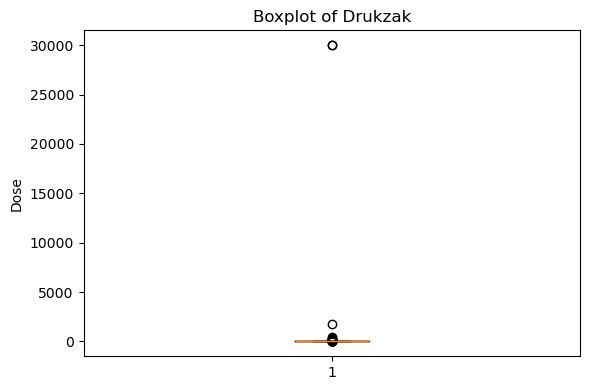

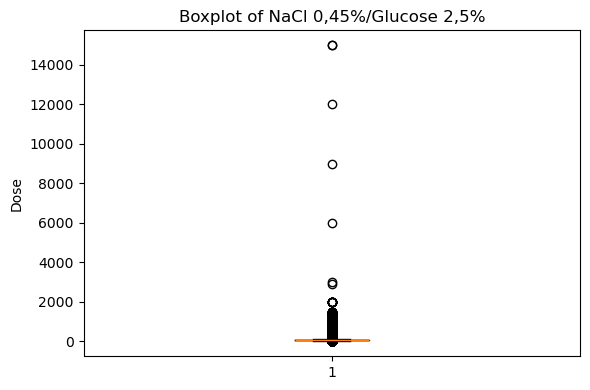

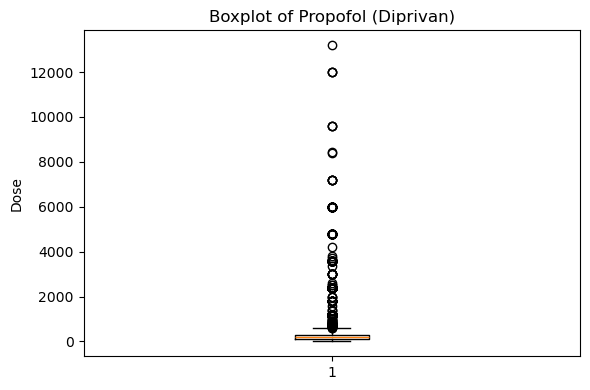

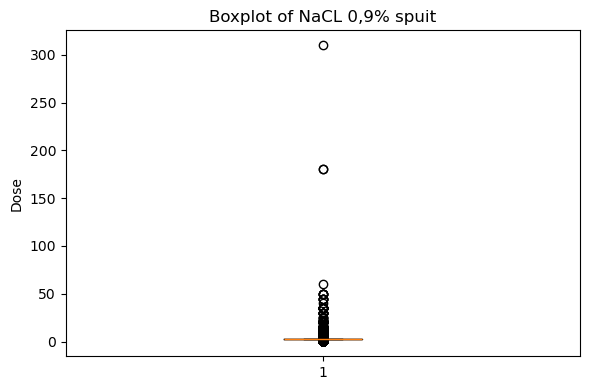

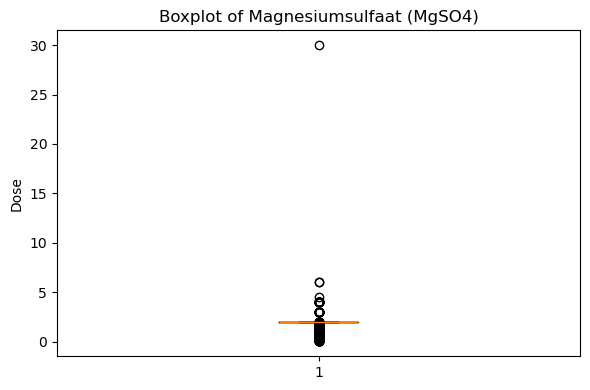

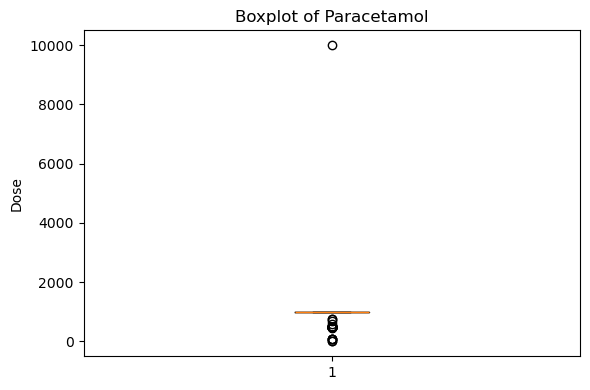

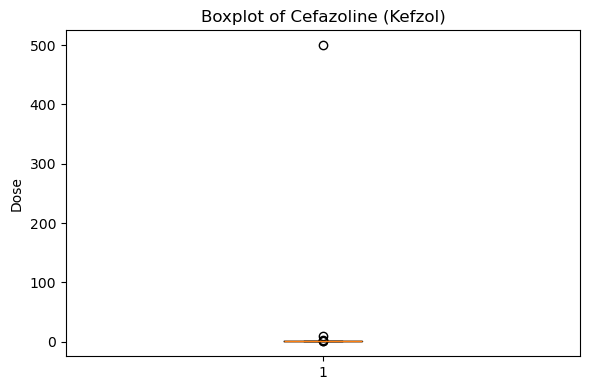

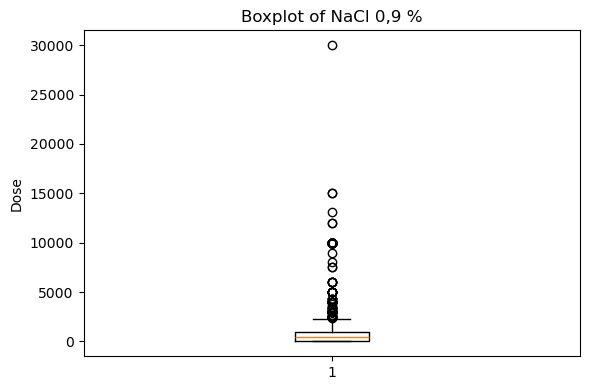

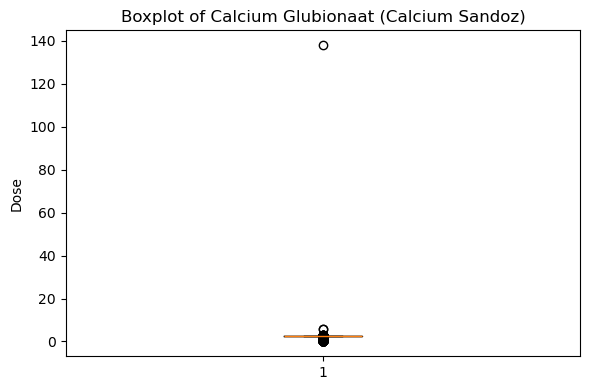

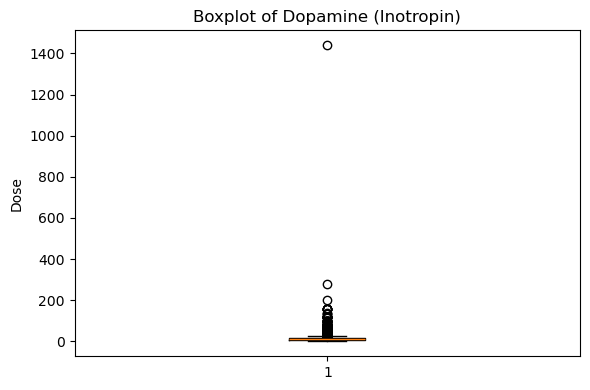

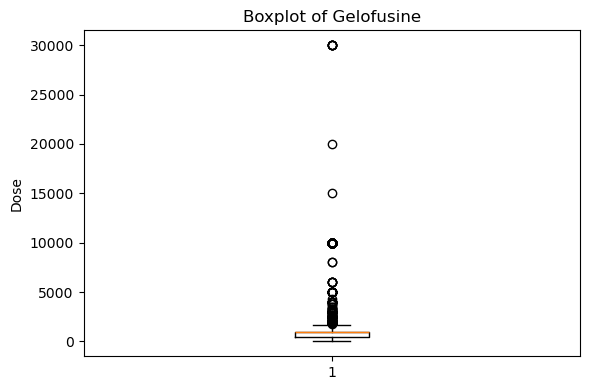

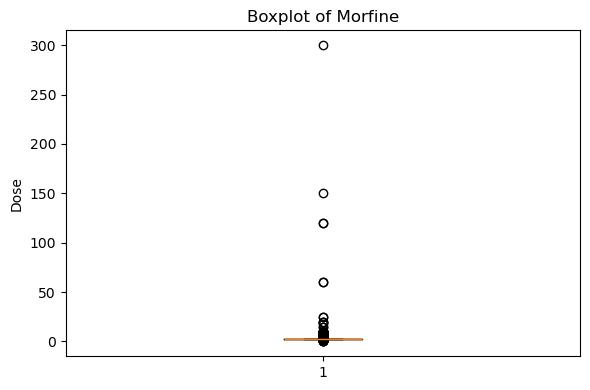

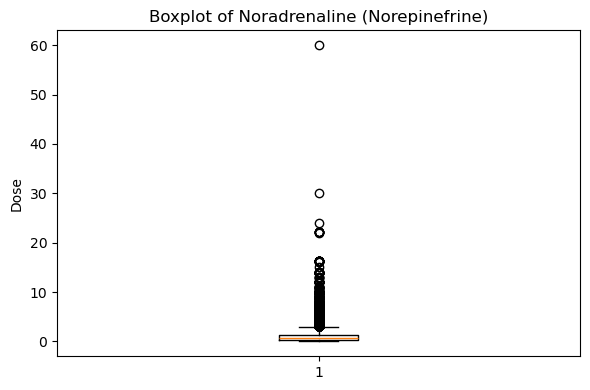

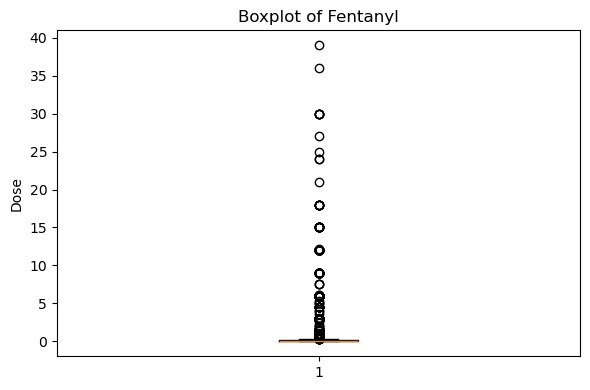

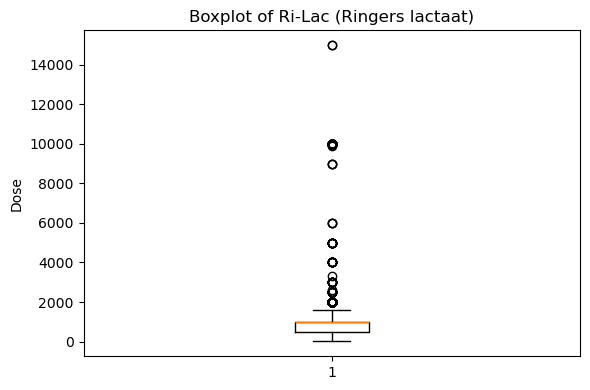

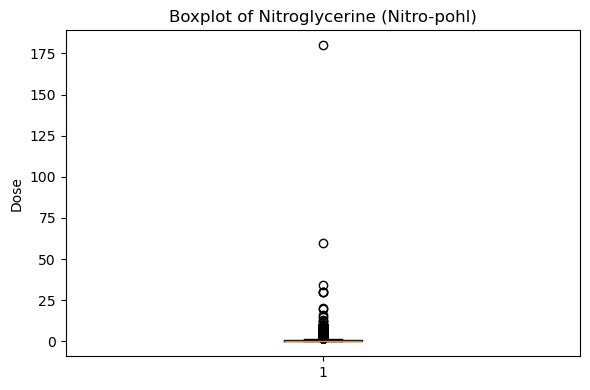

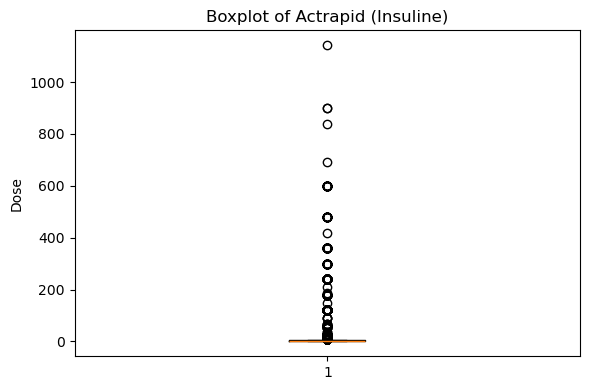

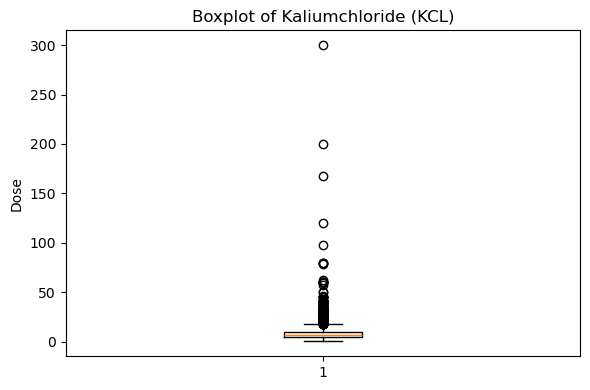

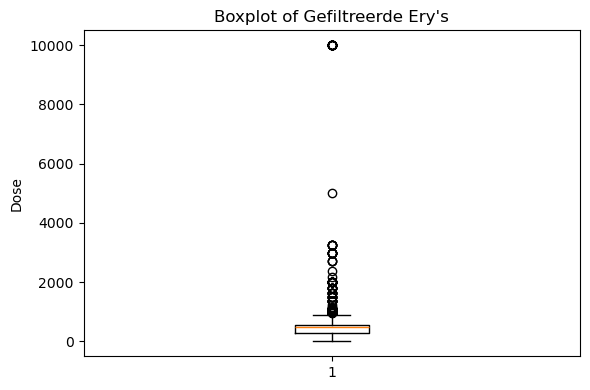

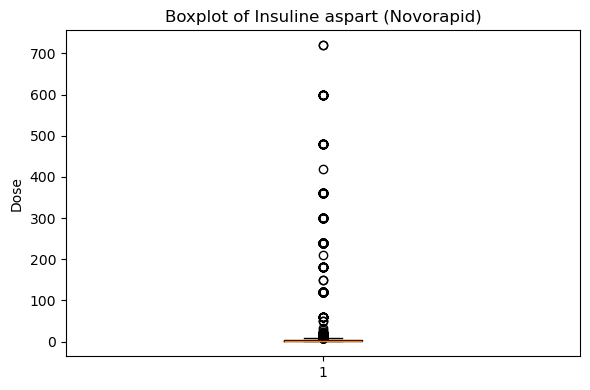

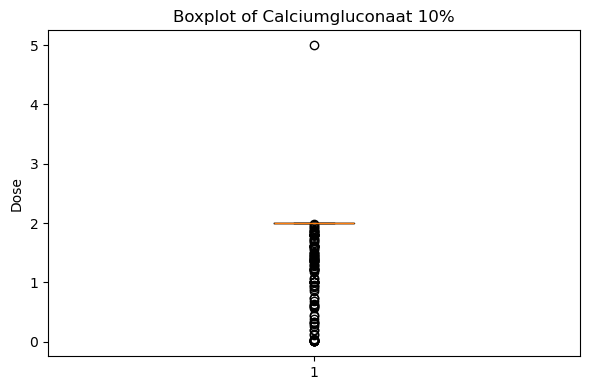

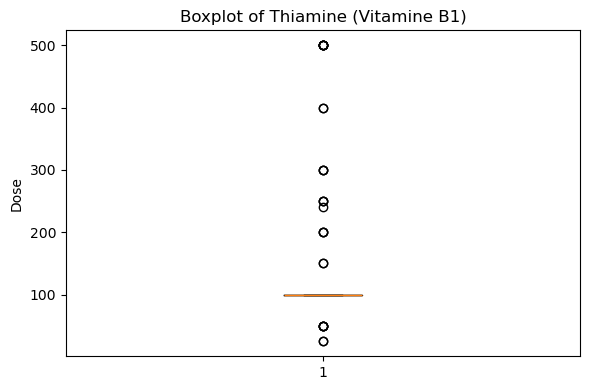

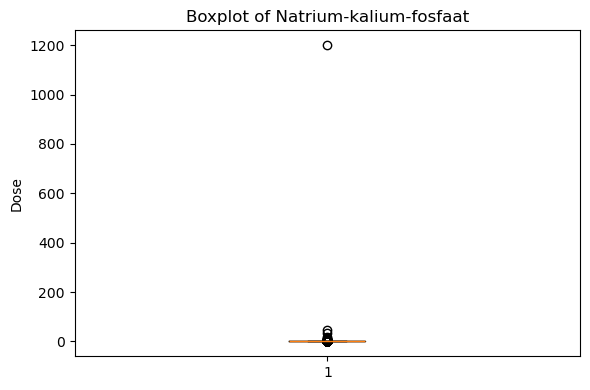

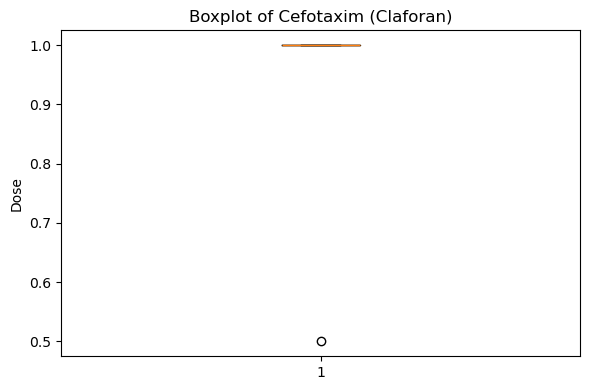

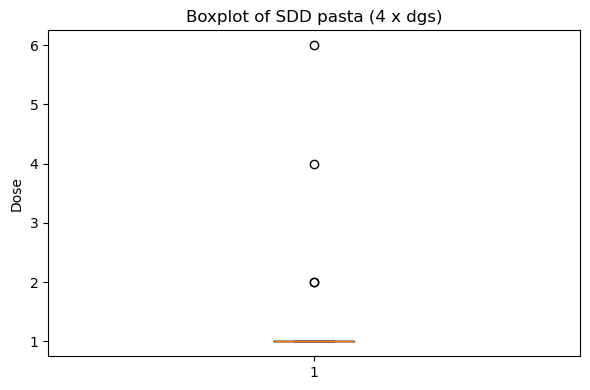

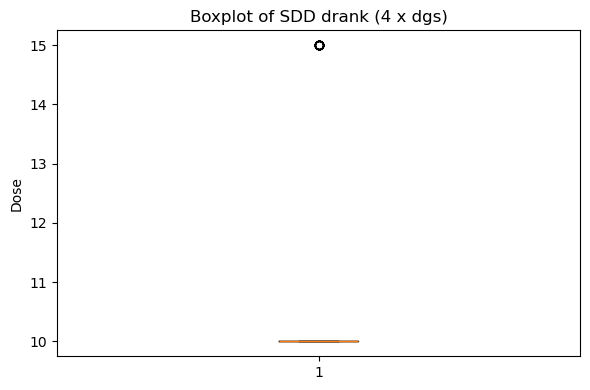

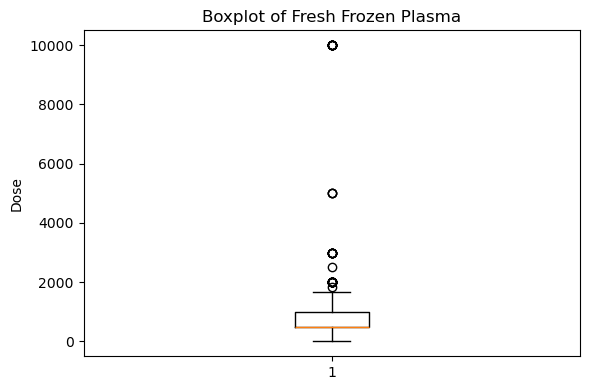

In [495]:
meds = [
    "Drukzak",
    "NaCl 0,45%/Glucose 2,5%",
    "Propofol (Diprivan)",
    "NaCL 0,9% spuit",
    "Magnesiumsulfaat (MgSO4)",
    "Paracetamol",
    "Cefazoline (Kefzol)",
    "NaCl 0,9 %",
    "Calcium Glubionaat (Calcium Sandoz)",
    "Dopamine (Inotropin)",
    "Gelofusine",
    "Morfine",
    "Noradrenaline (Norepinefrine)",
    "Fentanyl",
    "Ri-Lac (Ringers lactaat)",
    "Nitroglycerine (Nitro-pohl)",
    "Actrapid (Insuline)",
    "Kaliumchloride (KCL)",
    "Gefiltreerde Ery's",
    "Insuline aspart (Novorapid)",
    "Calciumgluconaat 10%",
    "Thiamine (Vitamine B1)",
    "Natrium-kalium-fosfaat",
    "Cefotaxim (Claforan)",
    "SDD pasta (4 x dgs)",
    "SDD drank (4 x dgs)",
    "Fresh Frozen Plasma"
]

for med in meds:
    doses = df_highpct.loc[df_highpct['item'] == med, 'dose']
    plt.figure(figsize=(6, 4))
    plt.boxplot(doses)
    plt.title(f'Boxplot of {med}')
    plt.ylabel('Dose')
    plt.tight_layout()
    plt.show()


In [498]:
thresholds = {
    "Drukzak":                                5000,
    "NaCl 0,45%/Glucose 2,5%":                4000,
    "Propofol (Diprivan)":                    6000,
    "NaCL 0,9% spuit":                        100,
    "Magnesiumsulfaat (MgSO4)":               10,
    "Paracetamol":                            2000,
    "Cefazoline (Kefzol)":                    100,
    "NaCl 0,9 %":                             20000,
    "Calcium Glubionaat (Calcium Sandoz)":    20,
    "Dopamine (Inotropin)":                   400,
    "Gelofusine":                             12000,
    "Morfine":                                100,
    "Noradrenaline (Norepinefrine)":          40,
    "Ri-Lac (Ringers lactaat)":               8000,
    "Nitroglycerine (Nitro-pohl)":            75,
    "Kaliumchloride (KCL)":                   250,
    "Gefiltreerde Ery's":                     6000,
    "Natrium-kalium-fosfaat":                 200
}

# compute mean per medication (excluding extreme outliers)
clean_means = {}
for med, thresh in thresholds.items():
    valid = df_highpct.loc[
        (df_highpct['item'] == med) &
        (df_highpct['dose'] <= thresh),
        'dose'
    ]
    clean_means[med] = valid.mean()

# replace extreme outliers with the clean mean
replaced_counts = {}
for med, thresh in thresholds.items():
    mask = (df_highpct['item'] == med) & (df_highpct['dose'] > thresh)
    replaced_counts[med] = mask.sum()
    if mask.any():
        df_highpct.loc[mask, 'dose'] = clean_means[med]

print("Outlier replacements per medication:")
for med, cnt in replaced_counts.items():
    print(f"  {med:35s}: {cnt}")


Outlier replacements per medication:
  Drukzak                            : 2
  NaCl 0,45%/Glucose 2,5%            : 5
  Propofol (Diprivan)                : 16
  NaCL 0,9% spuit                    : 3
  Magnesiumsulfaat (MgSO4)           : 1
  Paracetamol                        : 1
  Cefazoline (Kefzol)                : 1
  NaCl 0,9 %                         : 1
  Calcium Glubionaat (Calcium Sandoz): 1
  Dopamine (Inotropin)               : 1
  Gelofusine                         : 8
  Morfine                            : 4
  Noradrenaline (Norepinefrine)      : 1
  Ri-Lac (Ringers lactaat)           : 83
  Nitroglycerine (Nitro-pohl)        : 1
  Kaliumchloride (KCL)               : 1
  Gefiltreerde Ery's                 : 17
  Natrium-kalium-fosfaat             : 1


In [502]:
med_stats = (
    df_highpct
      .groupby(['admissionid', 'item'])['dose']
      .agg(mean_dose='mean', total_dose='sum')
      .reset_index()
)


df_med_wide = med_stats.pivot(
    index='admissionid',
    columns='item',
    values=['mean_dose', 'total_dose']
)

df_med_wide.columns = [
    f"{med}_{stat}" for stat, med in df_med_wide.columns
]

df_med_wide = df_med_wide.reset_index()

df_med_wide

,admissionid,Actrapid (Insuline)_mean_dose,Calcium Glubionaat (Calcium Sandoz)_mean_dose,Calciumgluconaat 10%_mean_dose,Cefazoline (Kefzol)_mean_dose,Cefotaxim (Claforan)_mean_dose,Dopamine (Inotropin)_mean_dose,Drukzak_mean_dose,Fentanyl_mean_dose,Fresh Frozen Plasma_mean_dose,...,"NaCl 0,9 %_total_dose",Natrium-kalium-fosfaat_total_dose,Nitroglycerine (Nitro-pohl)_total_dose,Noradrenaline (Norepinefrine)_total_dose,Paracetamol_total_dose,Propofol (Diprivan)_total_dose,Ri-Lac (Ringers lactaat)_total_dose,SDD drank (4 x dgs)_total_dose,SDD pasta (4 x dgs)_total_dose,Thiamine (Vitamine B1)_total_dose
0,0,NaN,2.75,NaN,1.0,NaN,NaN,15.0,NaN,NaN,...,NaN,NaN,0.5,NaN,NaN,100.00,NaN,NaN,NaN,NaN
1,1,NaN,2.75,NaN,1.0,NaN,8.0,17.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,139.86,NaN,NaN,NaN,NaN
2,2,NaN,2.75,NaN,1.0,NaN,NaN,15.0,NaN,250.0,...,NaN,NaN,NaN,1.6,1000.0,200.00,NaN,NaN,NaN,NaN
3,3,NaN,2.75,NaN,1.0,NaN,NaN,15.0,NaN,NaN,...,250.0,NaN,0.5,NaN,NaN,800.00,NaN,NaN,NaN,NaN
4,4,NaN,NaN,2.0,1.0,NaN,20.0,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1000.0,240.00,2000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,23548,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.100,NaN,...,84.0,NaN,NaN,0.7,1000.0,600.00,NaN,NaN,NaN,NaN
19710,23549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN
19711,23550,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
19712,23551,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.115,NaN,...,NaN,NaN,NaN,0.2,NaN,900.00,NaN,NaN,NaN,NaN


In [508]:
df_med_wide = df_med_wide.fillna(0)
df_med_wide

,admissionid,Actrapid (Insuline)_mean_dose,Calcium Glubionaat (Calcium Sandoz)_mean_dose,Calciumgluconaat 10%_mean_dose,Cefazoline (Kefzol)_mean_dose,Cefotaxim (Claforan)_mean_dose,Dopamine (Inotropin)_mean_dose,Drukzak_mean_dose,Fentanyl_mean_dose,Fresh Frozen Plasma_mean_dose,...,"NaCl 0,9 %_total_dose",Natrium-kalium-fosfaat_total_dose,Nitroglycerine (Nitro-pohl)_total_dose,Noradrenaline (Norepinefrine)_total_dose,Paracetamol_total_dose,Propofol (Diprivan)_total_dose,Ri-Lac (Ringers lactaat)_total_dose,SDD drank (4 x dgs)_total_dose,SDD pasta (4 x dgs)_total_dose,Thiamine (Vitamine B1)_total_dose
0,0,0.0,2.75,0.0,1.0,0.0,0.0,15.0,0.000,0.0,...,0.0,0.0,0.5,0.0,0.0,100.00,0.0,0.0,0.0,0.0
1,1,0.0,2.75,0.0,1.0,0.0,8.0,17.5,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,139.86,0.0,0.0,0.0,0.0
2,2,0.0,2.75,0.0,1.0,0.0,0.0,15.0,0.000,250.0,...,0.0,0.0,0.0,1.6,1000.0,200.00,0.0,0.0,0.0,0.0
3,3,0.0,2.75,0.0,1.0,0.0,0.0,15.0,0.000,0.0,...,250.0,0.0,0.5,0.0,0.0,800.00,0.0,0.0,0.0,0.0
4,4,0.0,0.00,2.0,1.0,0.0,20.0,15.0,0.000,0.0,...,0.0,0.0,0.0,0.0,1000.0,240.00,2000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,23548,0.0,0.00,0.0,0.0,0.0,0.0,10.0,0.100,0.0,...,84.0,0.0,0.0,0.7,1000.0,600.00,0.0,0.0,0.0,0.0
19710,23549,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0
19711,23550,0.0,0.00,0.0,0.0,0.0,0.0,5.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,2000.0,0.0,0.0,0.0
19712,23551,0.0,0.00,0.0,0.0,0.0,0.0,10.0,0.115,0.0,...,0.0,0.0,0.0,0.2,0.0,900.00,0.0,0.0,0.0,0.0


In [512]:
df_merged_extremes = df_merged2.merge(
    df_med_wide,
    on='admissionid',
    how='left'
)

df_merged_extremes

,patientid,admissionid,location,admissionyeargroup,agegroup,weightgroup,heightgroup,specialty,los_days,ABP diastolisch_mean,...,"NaCl 0,9 %_total_dose",Natrium-kalium-fosfaat_total_dose,Nitroglycerine (Nitro-pohl)_total_dose,Noradrenaline (Norepinefrine)_total_dose,Paracetamol_total_dose,Propofol (Diprivan)_total_dose,Ri-Lac (Ringers lactaat)_total_dose,SDD drank (4 x dgs)_total_dose,SDD pasta (4 x dgs)_total_dose,Thiamine (Vitamine B1)_total_dose
0,0,0,IC,2003-2009,80+,60-69,160-169,Cardiochirurgie,1.750000,49.000000,...,0.0,0.0,0.5,0.0,0.0,100.00,0.0,0.0,0.0,0.0
1,1,1,IC,2010-2016,60-69,70-79,170-179,Cardiochirurgie,1.083333,59.500000,...,0.0,0.0,0.0,0.0,0.0,139.86,0.0,0.0,0.0,0.0
2,2,2,IC,2010-2016,60-69,90-99,180-189,Cardiochirurgie,0.958333,66.285714,...,0.0,0.0,0.0,1.6,1000.0,200.00,0.0,0.0,0.0,0.0
3,3,3,IC,2003-2009,50-59,90-99,180-189,Cardiochirurgie,0.958333,79.200000,...,250.0,0.0,0.5,0.0,0.0,800.00,0.0,0.0,0.0,0.0
4,4,4,IC&MC,2010-2016,70-79,70-79,170-179,Cardiochirurgie,2.083333,51.219780,...,0.0,0.0,0.0,0.0,1000.0,240.00,2000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17881,20319,23545,MC,2010-2016,18-39,60-69,160-169,Traumatologie,5.458333,63.000000,...,0.0,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0
17882,20320,23546,IC,2010-2016,60-69,80-89,190+,Cardiologie,4.083333,73.310897,...,1000.0,0.0,0.0,0.6,0.0,360.00,2000.0,10.0,1.0,0.0
17883,20322,23548,IC&MC,2010-2016,40-49,70-79,180-189,Neurochirurgie,11.000000,84.666667,...,84.0,0.0,0.0,0.7,1000.0,600.00,0.0,0.0,0.0,0.0
17884,20323,23549,MC,2010-2016,40-49,60-69,160-169,Nefrologie,0.666667,-1.000000,...,0.0,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0


In [520]:
#add normaal hartritme at last

df_mergedfinal = df_merged_extremes.merge(
    flags,                   
    on='admissionid',
    how='left'              
)
df_mergedfinal

,patientid,admissionid,location,admissionyeargroup,agegroup,weightgroup,heightgroup,specialty,los_days,ABP diastolisch_mean,...,Natrium-kalium-fosfaat_total_dose,Nitroglycerine (Nitro-pohl)_total_dose,Noradrenaline (Norepinefrine)_total_dose,Paracetamol_total_dose,Propofol (Diprivan)_total_dose,Ri-Lac (Ringers lactaat)_total_dose,SDD drank (4 x dgs)_total_dose,SDD pasta (4 x dgs)_total_dose,Thiamine (Vitamine B1)_total_dose,normaal_hartritme
0,0,0,IC,2003-2009,80+,60-69,160-169,Cardiochirurgie,1.750000,49.000000,...,0.0,0.5,0.0,0.0,100.00,0.0,0.0,0.0,0.0,1
1,1,1,IC,2010-2016,60-69,70-79,170-179,Cardiochirurgie,1.083333,59.500000,...,0.0,0.0,0.0,0.0,139.86,0.0,0.0,0.0,0.0,1
2,2,2,IC,2010-2016,60-69,90-99,180-189,Cardiochirurgie,0.958333,66.285714,...,0.0,0.0,1.6,1000.0,200.00,0.0,0.0,0.0,0.0,1
3,3,3,IC,2003-2009,50-59,90-99,180-189,Cardiochirurgie,0.958333,79.200000,...,0.0,0.5,0.0,0.0,800.00,0.0,0.0,0.0,0.0,1
4,4,4,IC&MC,2010-2016,70-79,70-79,170-179,Cardiochirurgie,2.083333,51.219780,...,0.0,0.0,0.0,1000.0,240.00,2000.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17881,20319,23545,MC,2010-2016,18-39,60-69,160-169,Traumatologie,5.458333,63.000000,...,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0,0
17882,20320,23546,IC,2010-2016,60-69,80-89,190+,Cardiologie,4.083333,73.310897,...,0.0,0.0,0.6,0.0,360.00,2000.0,10.0,1.0,0.0,1
17883,20322,23548,IC&MC,2010-2016,40-49,70-79,180-189,Neurochirurgie,11.000000,84.666667,...,0.0,0.0,0.7,1000.0,600.00,0.0,0.0,0.0,0.0,1
17884,20323,23549,MC,2010-2016,40-49,60-69,160-169,Nefrologie,0.666667,-1.000000,...,0.0,0.0,0.0,1000.0,0.00,0.0,0.0,0.0,0.0,1


In [524]:
df_mergedfinal.isna().sum()

patientid                                0
admissionid                              0
location                                 0
admissionyeargroup                       0
agegroup                                 0
                                      ... 
Ri-Lac (Ringers lactaat)_total_dose    242
SDD drank (4 x dgs)_total_dose         242
SDD pasta (4 x dgs)_total_dose         242
Thiamine (Vitamine B1)_total_dose      242
normaal_hartritme                        0
Length: 123, dtype: int64

In [526]:
df_mergedfinal.to_csv('df_adm2.csv', index=False)
